# **EKSPERIMEN MODEL REGRESI UNTUK PREDIKSI CUSTOMER LIFETIME VALUE PADA SEBUAH PERUSAHAAN ASURANSI KENDARAAN**

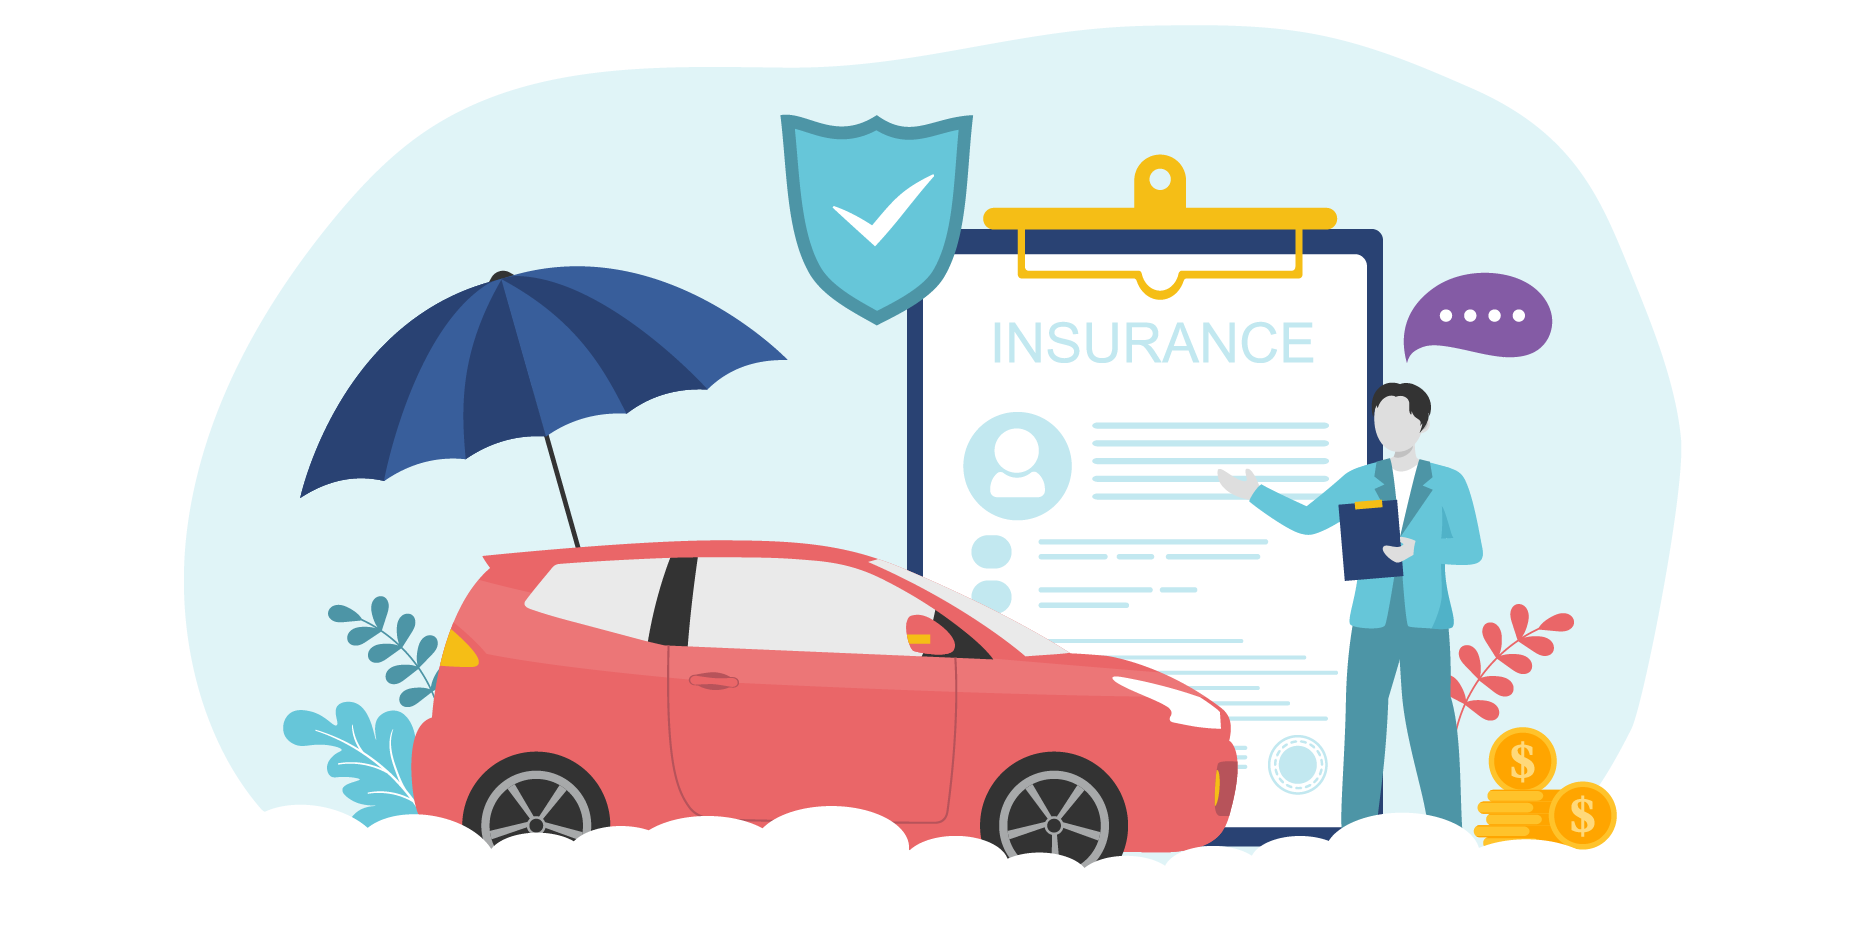

# Library

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Data Cleaning
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preprocessing
from sklearn.preprocessing import KBinsDiscretizer, RobustScaler, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Data Transformation
import scipy.stats as stats
from scipy.stats import kstest, shapiro, normaltest
from statsmodels.stats.diagnostic import lilliefors

# Data CrossValidation
from sklearn.model_selection import KFold, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation Matrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import make_scorer

# Library untuk menyimpan final model
import pickle

# Pemahaman Permasalahan Bisnis

## **Latar Belakang**

Customer Lifetime Value (CLV) membantu perusahaan asuransi memahami nilai jangka panjang pelanggan dan mengalokasikan sumber daya pemasaran lebih efektif. Faktor seperti premi bulanan, klaim, dan jumlah polis memengaruhi CLV, namun kompleksitas data menjadi tantangan. Machine learning memberikan solusi dengan menganalisis pola tersembunyi, memungkinkan prediksi CLV yang lebih akurat dan meningkatkan efisiensi operasional..[CLV Predict](https://www.researchgate.net/publication/328051658_Customer_Lifetime_Value_Prediction_Models_A_Comprehensive_Review).

Kesalahan prediksi CLV dapat menyebabkan kerugian besar, terutama bagi perusahaan dengan banyak pelanggan. Fokus pada segmen yang tidak menguntungkan dapat membuang sumber daya. Model CLV berbasis machine learning membantu menghindari investasi yang salah dan meningkatkan retensi serta profitabilitas jangka panjang.[Model CLV](https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/customer-lifetime-value-the-customer-compass)

Aspek penting dalam modeling CLV adalah mempertimbangkan **rasio CLV-to-CAC (Customer Acquisition Cost)**. Rasio CLV/CAC yang ideal adalah sekitar **3:1**, yang berarti pelanggan diharapkan memberikan kontribusi pendapatan tiga kali lipat dari biaya akuisisinya [(CLV-CAC RATIO)](https://blog.smile.io/clv-cac-ratio-calculating-the-magic-metric/). Ketika perusahaan gagal memprediksi CLV secara akurat, mereka berisiko mengalami kerugian besar karena salah dalam mengalokasikan sumber daya pada pelanggan yang tidak menguntungkan. Data ini menunjukkan pentingnya **prediksi CLV yang akurat** dalam menjaga profitabilitas dan efisiensi perusahaan [Close CRM](ps://www.close.com/blog/customer-lifetime-value)

Salah satu pemecahan masalah adalah menggunakan model non-parametrik seperti **Random Forest** atau **XGBoost**, masalah **multikolinearitas** yang kerap muncul pada model parametrik tidak menjadi kendala. Ini karena model non-parametrik dapat menangani korelasi antar variabel lebih baik, sehingga menghasilkan prediksi CLV yang lebih stabil dan akurat.Dengan menerapkan model prediksi CLV berbasis machine learning, perusahaan asuransi dan perusahaan lain dengan basis pelanggan besar dapat meningkatkan loyalitas pelanggan, mengoptimalkan strategi pemasaran, dan memperkuat profitabilitas dalam jangka panjang.

## **Stake Holder**

Tentunya yang berkaitan dengan kenaikan dan penurunan nilai Customer Lifetime Value disebuah perusahaan (seperti Perusahaan E-commerce, Perusahaan SaaS (Software as a Service), Perusahaan Telekomunikasi dll) , khususnya pada kasus ini adalah perusahaan asuransi mobil, yaitu:

- **Tim Keuangan**<br>
Berkepentingan dalam memahami faktor-faktor yang mempengaruhi CLV untuk meningkatkan profitabilitas.

- **Tim Manajemen dan Pengembangan Produk**<br>
Memerlukan wawasan untuk merancang produk dan layanan yang dapat meningkatkan CLV.

- **Tim Data Science**<br>
Bertanggung jawab dalam melakukan analisis data dan membangun model prediktif yang akurat.

- **Tim Pemasaran**<br>
Menggunakan hasil analisis untuk mengarahkan upaya pemasaran yang lebih efektif kepada pelanggan bernilai tinggi.

## **Permasalahan**

Membangun dan mengembangkan model prediksi CLV Random forest berbasis machine learning dapat meningkatkan efisiensi alokasi anggaran, dan memaksimalkan retensi serta profitabilitas perusahaan.

## **Tujuan**

Sebelumnya, perusahaan telah menggunakan sistem berbasis aturan (**rule-based system**) untuk memprediksi **Customer Lifetime Value (CLV)** dengan **MAE Score** sebesar **\$4161.14**, yang sering kali menghasilkan tingkat error yang tinggi. Oleh karena itu, perusahaan ingin meningkatkan akurasi prediksi CLV dengan metode yang lebih canggih.

Berdasarkan permasalahan tersebut, berikut adalah tujuan dari pemodelan ini:

1. **Meningkatkan Akurasi Prediksi CLV**:
   - Tujuan utama dari modeling ini adalah membangun dan menerapkan model regresi terbaik untuk memprediksi **CLV**, yang mampu memberikan hasil yang lebih akurat dibandingkan dengan metode **rule-based**. Dengan menggunakan algoritma **machine learning**, model ini diharapkan dapat menganalisis data demografis dan data asuransi pelanggan secara lebih efektif.
   
2. **Mempercepat Pengambilan Keputusan**:
   - Dengan model prediksi CLV yang lebih cepat dan akurat, divisi pemasaran akan memiliki kemampuan untuk membuat keputusan strategis terkait pelanggan dengan lebih cepat. Ini termasuk strategi retensi, penawaran khusus, dan layanan pelanggan yang lebih personal.

3. **Memahami Kontribusi Fitur Penting**:
   - Pemodelan ini juga bertujuan untuk memahami kontribusi variabel-variabel seperti **Vehicle Class**, **Coverage**, **Renew Offer Type**, **Employment Status**, **Education**, **Number of Policies**, **Monthly Premium Auto**, **Total Claim Amount**, dan **Income** terhadap prediksi CLV. Pengetahuan ini akan membantu perusahaan mengidentifikasi faktor-faktor yang paling mempengaruhi nilai jangka panjang pelanggan.

4. **Hyperparameter Tuning untuk Meningkatkan Performa Model**:
   - Memahami bagaimana tuning hyperparameter dapat meningkatkan performa model juga menjadi salah satu fokus penting. Proses ini bertujuan untuk mengoptimalkan parameter model sehingga memberikan hasil prediksi yang lebih akurat dan sesuai dengan kebutuhan bisnis.

Dengan mencapai tujuan-tujuan tersebut, perusahaan diharapkan dapat:
   - Meningkatkan **pendapatan** dengan memaksimalkan nilai pelanggan jangka panjang.
   - Mengoptimalkan **strategi pemasaran** berdasarkan prediksi yang lebih tepat.
   - Menciptakan **pengalaman pelanggan yang lebih baik** dengan tindakan yang didasarkan pada wawasan dari analisis **Customer Lifetime Value (CLV)**.

## **Pendekatan Analitik**
Langkah yang akan dilakukan adalah menganalisis data yang diperoleh untuk mengidentifikasi pola dari berbagai fitur yang ada, yang dapat membedakan CLV pada masing-masing pelanggan. Model regresi akan digunakan untuk membantu perusahaan dalam menyediakan alat prediksi CLV dengan bantuan algoritma machine learning. Secara detail, analisis yang akan dilakukan adalah sebagai berikut:

- Melakukan Preprocessing pada dataset.
- Melakukan Benchmarking pada beberapa model regresi untuk memilih model yang paling tepat untuk dataset.
- Melakukan Hyperparameter Tuning pada model terpilih untuk mendapatkan hasil error yang lebih rendah.

## **Metrik Evaluasi**

Metrik evaluasi yang akan digunakan adalah `RMSE, MAE, dan MAPE` dengan keterangan sebagai berikut:
1. `MAE`: Mean Absolute Error (Rataan Nilai Absolut dari Error)<br>
MAE mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual. Nilai ini menunjukkan seberapa besar kesalahan prediksi dalam satuan yang sama dengan target, yang memudahkan interpretasi langsung oleh pengguna bisnis.
2. `RMSE`: Root Mean Square Error (Rataan Akar Kuadrat dari Error)<br>
RMSE digunakan sebagai pendukung untuk memastikan bahwa kesalahan besar yang mungkin terjadi dapat diidentifikasi.
3. `MAPE`: Mean Absolute Percentage Error (Rataan Persentase Absolut dari Error)<br>
`MAPE` mengukur kesalahan prediksi dalam bentuk persentase, sehingga memudahkan interpretasi seberapa jauh prediksi meleset dibandingkan nilai aktual. Ini sangat berguna dalam konteks CLV, di mana sering kali lebih mudah memahami kesalahan dalam skala relatif (persentase) daripada dalam bentuk angka absolut.

4. `R-Squared`: Koefisien Determinasi<br>
R² adalah ukuran statistik yang menunjukkan kesesuaian model regresi yang memberikan wawasan tambahan tentang seberapa baik model menjelaskan hubungan antara input dan output dalam data CLV. Nilai R-squared berkisar antara 0 hingga 1. Nilai R-squared sama dengan 1 ketika model benar-benar sesuai dengan data dan tidak ada perbedaan antara nilai prediksi dan nilai aktual. Namun, nilai R-kuadrat sama dengan 0 ketika model tidak memprediksi variabilitas apa pun dalam model dan tidak mempelajari hubungan apa pun antara variabel dependen dan independen.

MAE dipilih sebagai metrik acuan karena memberikan ukuran kesalahan rata-rata yang lebih stabil dan mudah dipahami, tanpa terlalu dipengaruhi oleh outlier, kemudian akan didukung dengan hasil dari RMSE, MAPE dan R2

Dari eksperimen yang akan dilakukan, kita akan mengecek bahwa jika **semakin kecil nilai MAE, RMSE, dan MAPE yang dihasilkan, maka semakin akurat model tersebut dalam memprediksi CLV sesuai dengan batasan fitur yang digunakan, semakin mendekati 1 maka semakin kecil perbedaan antara data prediksi dengan data aktual**. Perumusan perhitungan RMSE, MAE, dan MAPE disajikan pada gambar di bawah. Pembahasan lebih lanjut akan dijelaskan dengan detail di tahapan selanjutnya.

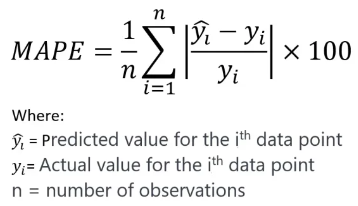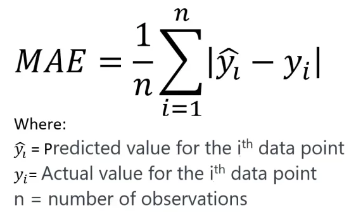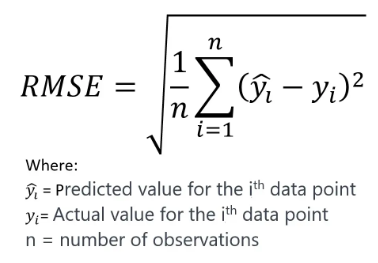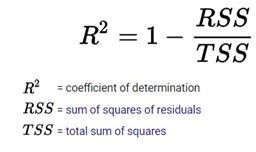

# Pemahman Data

## Informasi Umum

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('data_customer_lifetime_value.csv')

# Set option to display all columns
pd.set_option('display.max_columns', None)

In [ ]:
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


**Customer lifetime value (CLV)** adalah ukuran seberapa berharga seorang pelanggan bagi perusahaan. Dari nilai ini, perusahaan dapat menentukan berapa banyak keuntungan yang diperoleh dari satu pelanggan dan biaya yang dikeluarkan untuk mendapatkan atau mempertahankan pelanggan baru. Angka ini sangat penting bagi perusahaan jika ingin menargetkan pemasaran kepada pelanggan yang bernilai secara efektif dan bagaimana perubahan pelanggan perusahaan di masa depan.

Dataset yang kamu berikan mencakup beberapa fitur kunci berikut:

| Fitur | Pengertian |
|---|---|
|**Vehicle Class** |Jenis kendaraan yang dimiliki pelanggan |
|**Coverage** | Jenis cakupan asuransi yang diambil pelanggan|
|**Renew Offer Type**| Jenis penawaran yang diberikan saat perpanjangan|
|**Employment Status**| Status pekerjaan pelanggan|
|**Marital Status**| Status pernikahan pelanggan|
|**Education**| Tingkat pendidikan pelanggan|
|**Number of Policies**| Jumlah polis asuransi yang dimiliki oleh pelanggan|
|**Monthly Premium Auto**| Pembayaran bulanan yang dilakukan pelanggan untuk asuransi mobil|
|**Total Claim Amount**| Total jumlah klaim yang diajukan oleh pelanggan|
|**Income**| Pendapatan tahunan pelanggan|


<br>Pada eksperimen ini, variabel yang menjadi target adalah CLV

| Variabel Taget | Pengertian |
|---|---|
|**Customer Lifetime Value**| Prediksi nilai profit atau keuntungan yang dihasilkan dari pelanggan|

<br>dataset yang akan digunakan dapat anda akses pada link ini: [Customer_Lifetime_Value.csv](https://drive.google.com/file/d/1ARLdqHBkCF9yDxZWsYnmzUjIr6HeSdhG/view?usp=sharing)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


dari hasil running kode diatas didapatkan informasi bahwa:
- Data Customer Lifetime Value yang dimiliki berdimensi 5669 baris dan 11 kolom
- Terdiri atas 5 data `float64` dan 6 data `object`/`string`.
- seluruh tipe data sudah sesuai dengan fungsi dari fitur yang tersedia

In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


In [ ]:
num = df.select_dtypes(include='number')
cat = df.select_dtypes(include='object')

## Formatting data

Akan dilakukan re-formating tipe data `Number Of Policies`

In [ ]:
df['Number of Policies'] = df['Number of Policies'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   int64  
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 487.3+ KB


dapat dilihat bahwa tipe data kolom `Number of Policies` telah diperbaharui

## Data Hilang

Pada pemodelan Machine Learning, harus dipastikan bahwa dataset tidak memiliki missing Value. Handling missing value dapat dilakukan dengan pengisian nilai hilang dengan beberapa metode seperti dengan domain knowledge, iterative imputer, ataupun dropping row yang memiliki data NaN. Pemilihan metode terebut dapat disesuaikan dengan konteks dari data yang dimiliki.

In [ ]:
def nan_tab(df):
    nan = df.isna().sum()
    percof_missval = pd.DataFrame({'perscentage': round((nan/len(df))*100,2).sort_values(ascending = False)})

    nan_table = pd.concat([nan, percof_missval], axis = 1)
    nan_table.columns = ['jumlah', 'persentase %']

    nan_table = nan_table[nan_table['jumlah'] != 0]
    return nan_table

In [ ]:
if len(nan_tab(df))==0:
  print('Tidak ada missing value')
else:
  print('Ada missing value')
  display(nan_tab(df))

Tidak ada missing value


<Axes: >

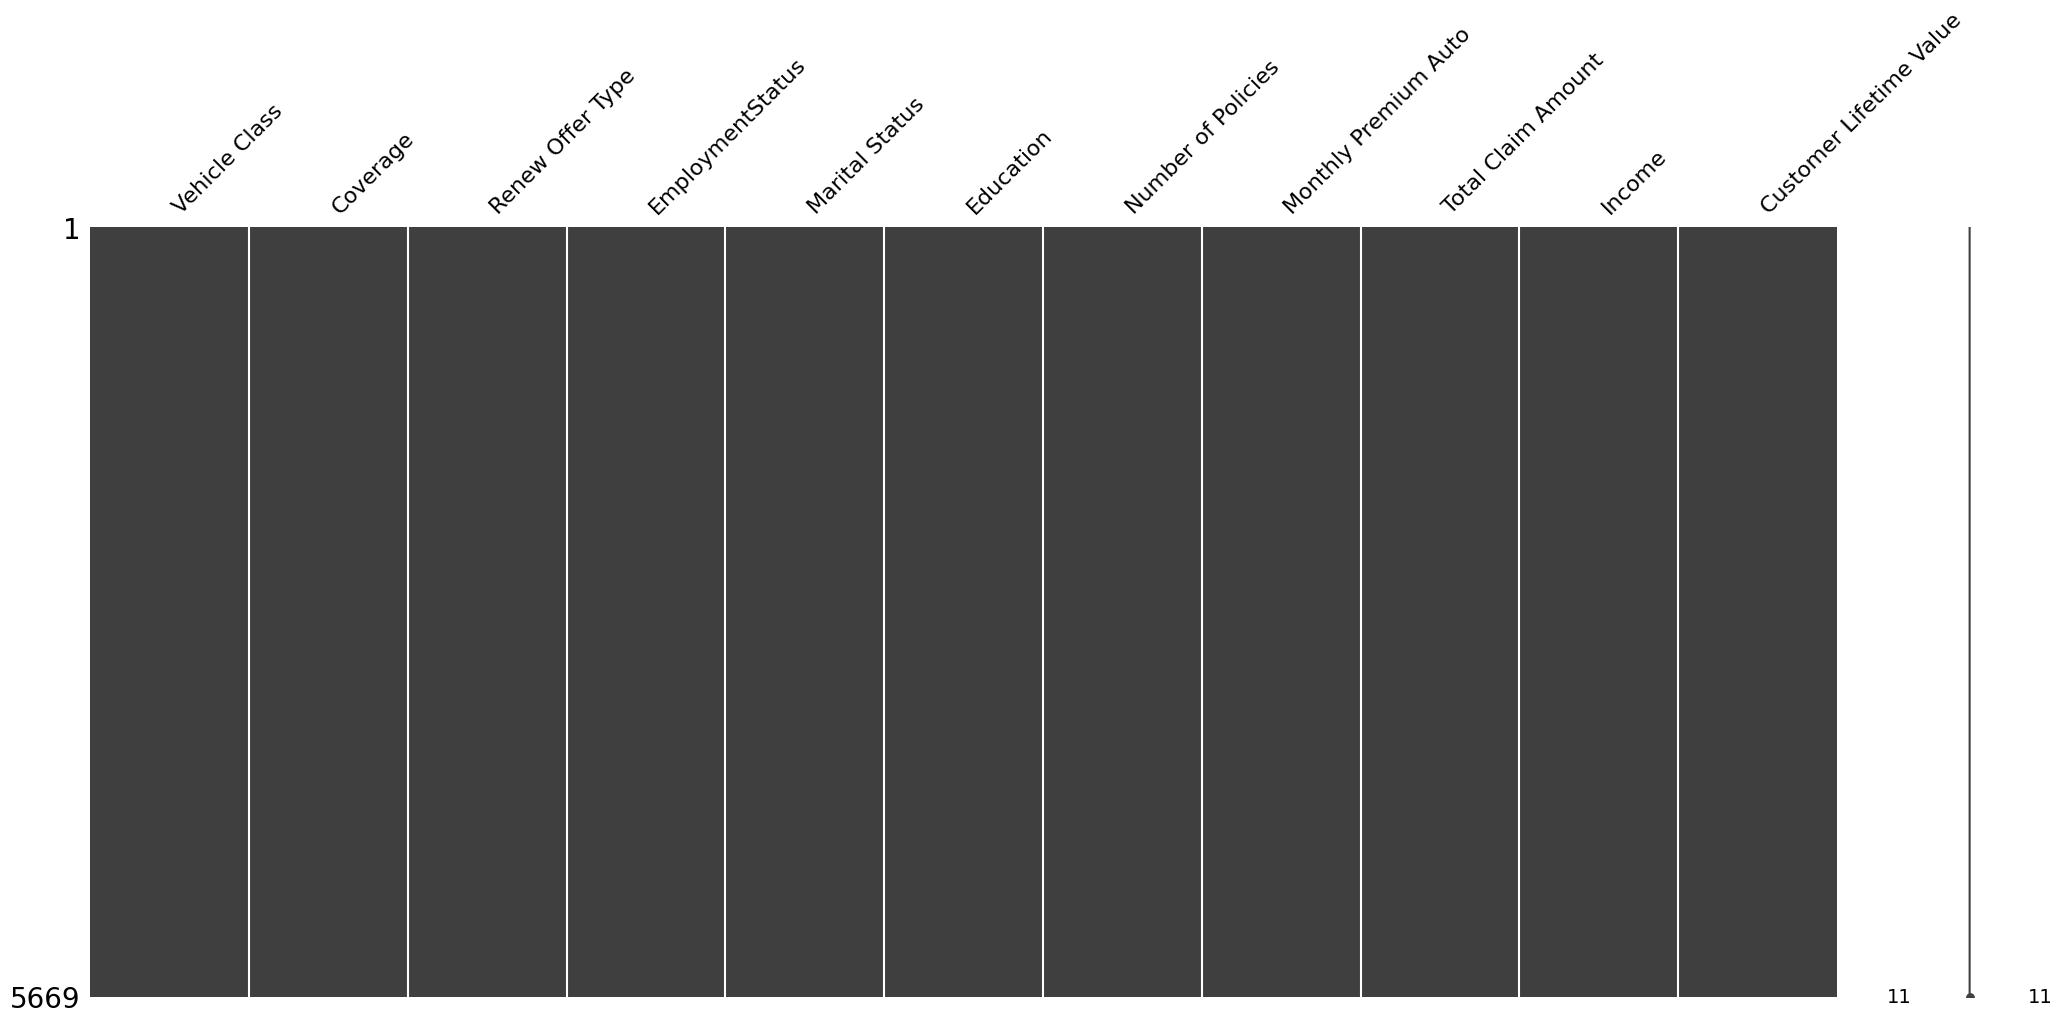

In [ ]:
import missingno
missingno.matrix(df)

Dari pengecekan diatas, didapati bahwa **tidak ada data NaN pada dataset** yang dimiliki. Meski demikian, mengingat adanya kemungkinan penginputan lain pada data dengan kode tertentu yang dapat merepresentasikan missing value, maka harus dilakukan pengamatan terhadap data lebih lanjut.

In [ ]:
for i in df.columns:
   print(df[i].value_counts())
   print()

Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car       307 
Luxury SUV       115 
Luxury Car       107 
Name: count, dtype: int64

Coverage
Basic       3477
Extended    1704
Premium     488 
Name: count, dtype: int64

Renew Offer Type
Offer1    2292
Offer2    1835
Offer3    900 
Offer4    642 
Name: count, dtype: int64

EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave    267 
Disabled         252 
Retired          180 
Name: count, dtype: int64

Marital Status
Married     3305
Single      1514
Divorced    850 
Name: count, dtype: int64

Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                  460 
Doctor                  226 
Name: count, dtype: int64

Number of Policies
1    2008
2    1413
3    727 
7    271 
5    270 
9    264 
4    251 
6    236 
8    229 
Name: count, dtype: int64

Monthly Premium Auto
65.0     217
71.0     203
66.0     186
69.0     18

In [ ]:
# Menghitung jumlah baris dengan Income bernilai 0
missing_income_count = (df['Income'] == 0).sum()

# Membuat DataFrame dengan index
missing_income = pd.DataFrame({
    'jumlah': [missing_income_count],  # Harus menggunakan list
    'persentase %': [round((missing_income_count / len(df)) * 100, 2)]  # Total baris data adalah len(df)
})

# Menampilkan hasil
missing_income

,jumlah,persentase %
0,1429,25.21


dari hasil analisis diatas, didapatkan salah satu informasi yang janggal yakni terdapat nilai 0.0 pada kolom `Income`, sebanyak 25.21% dari total data yang dimiliki.Apakah nilai tersebut missing value yang disebabkan oleh adanya error atau memang sudah sesuai dengan data real di lapangan? Untuk memverifikasi praduga tersebut, nantinya perlu dilakukan analisis lebih lanjut.

## Data Duplikat

In [ ]:
dupe = df.duplicated().sum()

if dupe == 0:
  print(f'Tidak ditemukan adanya set data duplikat')
else:
  print(f'Ditemukan set data duplikat sebanyak {dupe} data')

Ditemukan set data duplikat sebanyak 618 data


In [ ]:
df_duplicate = pd.DataFrame({
    'No.':[1],
    'Jlh Data Duplikat':df.duplicated().sum(),
    '%Data Duplikat':df.duplicated().sum() / len(df) * 100,
})

df_duplicate.drop(columns='No.', inplace=True)
#kenapa diatas sudah buat kolom No. tapi didrop? Karena kalau tidak diberikan index, maka akan error dataframenya. Untuk mengakali, dibikin dulu index, lalu didrop

df_duplicate

,Jlh Data Duplikat,%Data Duplikat
0,618,10.901394


In [ ]:
pd.DataFrame({
    'kolom': df.columns.values,
    'duplikat' : df.duplicated().sum() })

,kolom,duplikat
0,Vehicle Class,618
1,Coverage,618
2,Renew Offer Type,618
3,EmploymentStatus,618
4,Marital Status,618
5,Education,618
6,Number of Policies,618
7,Monthly Premium Auto,618
8,Total Claim Amount,618
9,Income,618


In [ ]:
# Mengambil semua data yang memiliki duplikat (termasuk duplikat dan kemunculan pertama)
dupe_data = df[df.duplicated(keep=False)]

# Mengelompokkan berdasarkan semua kolom dan menghitung jumlah kemunculan
dupe_count = dupe_data.groupby(list(df.columns)).size().reset_index(name='Jumlah Duplikat')

# Menampilkan hasil
dupe_count.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Jumlah Duplikat
0,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1,63.0,352.394515,19864.0,2359.423599,4
1,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2,74.0,523.888845,26057.0,8509.850887,5
2,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,3,65.0,312.000000,22886.0,5096.673223,5
3,Four-Door Car,Basic,Offer1,Employed,Divorced,Bachelor,9,69.0,331.200000,67798.0,5548.031892,4
4,Four-Door Car,Basic,Offer1,Employed,Divorced,Doctor,1,62.0,67.530904,36631.0,2491.317024,4


terlihat bahwa sebesar 10.9% data pada dataset adalah data duplikat, dan diperkirakan seluruh data duplikat untuk masing2 kolom berada di baris yang sama. Maka perlu dilakukan handling data duplikat saat proses data cleaning.

## Variabel Numerik

### Statistika Deskriptif

In [ ]:
numerik = df.select_dtypes(include = 'number')

In [ ]:
numerik.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


Dari tabel diatas, didapatkan beberapa informasi bahwa:
  - **Number of Policies** </t> : Sebagian besar nasabah memiliki jumlah polis asuransi yang relatif sedikit (dengan 50% pelanggan memiliki 2 polis atau kurang (median 2))
  - **Monthly Premium Auto** </t>: Premi bulanan memiliki distribusi yang relatif ketat dengan mayoritas pelanggan membayar premi antara 68 (Q2) dan 109 (Q3), menunjukkan adanya keseragaman dalam struktur premi.
  - **Total Claim Amount** :
    - Sebagian besar pelanggan memiliki klaim total antara \$266.93 dan \$549.99, dan terdapat beberapa nilai claim yang cukup besar dengan nilai klaim maximum senilai \$2759.794
    - Klaim rata-rata adalah sekitar $431 dengan variasi besar (standar deviasi tinggi). Sebagian besar klaim berada di kisaran rendah hingga menengah  
  - **Income** : Sebagian pelanggan memiliki pendapatan rendah atau tidak tercatat (min dan Q1 bernilai \$0.0), sementara ada juga pelanggan dengan pendapatan tinggi.
  - **Customer Lifetime Value (CLV)**: Sebagian besar pelanggan memiliki CLV yang moderat, dengan beberapa pelanggan memiliki nilai CLV yang signifikan lebih tinggi.


  

### Distribusi Data

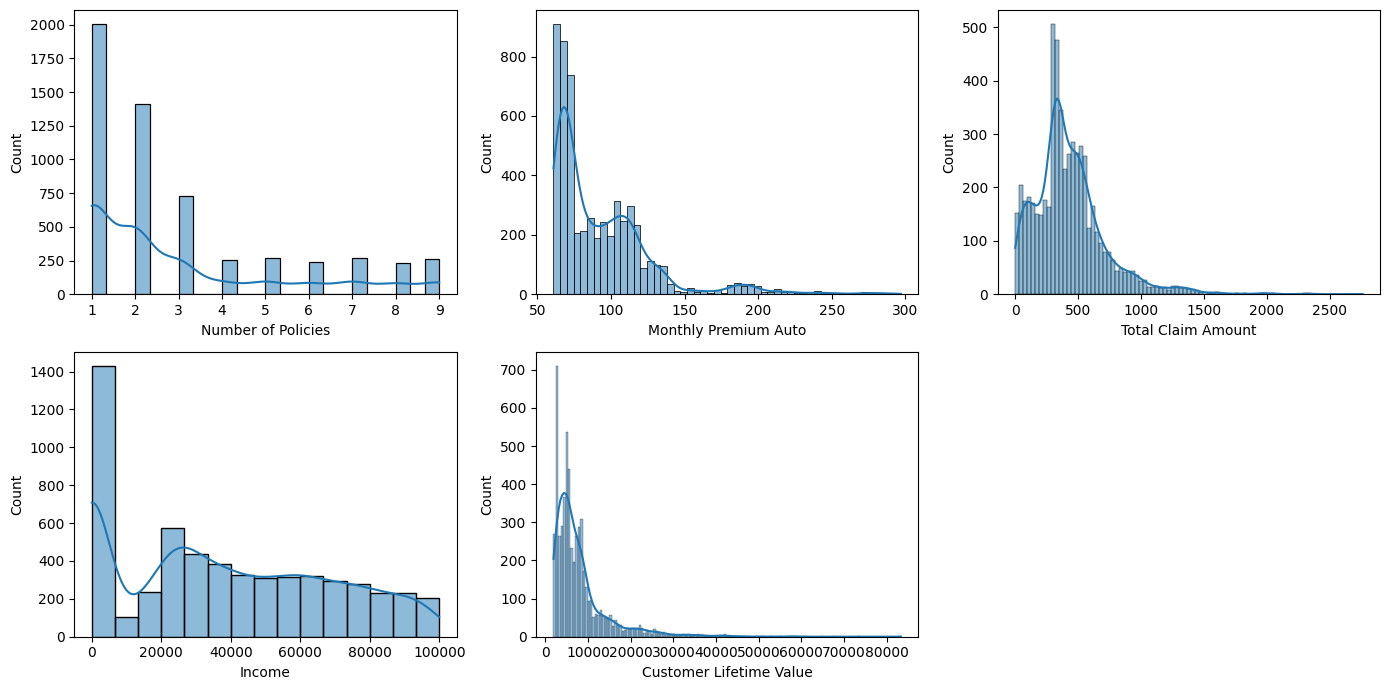

In [ ]:
plt.figure(figsize = (14,7))

posisi = 1
for setiap_kolom in numerik.columns:
    plt.subplot(2,3,posisi)
    sns.histplot(df[setiap_kolom], kde=True)
    posisi = posisi + 1
    plt.tight_layout()

Dari tabel diatas, dapat dilihat bahwa seluruh data numerik pada **dataset skewed kanan** dengan beberapa informasi yang dapat diambil diantaranya:
- **Number of Policies**: Sebagian besar nasabah memiliki 1-4 polis, namun, mayoritas nasabah hanya mengguakan 1 polis saja. Ini menunjukkan bahwa kebanyakan pelanggan cenderung memilih jumlah polis yang lebih sedikit.

- **Monthly Premium Auto**: Sebagian besar pelanggan membayar premi antara \$60–\$110, dengan penurunan frekuensi setelah 150. Ini mengindikasikan bahwa hanya sedikit pelanggan yang membayar premi yang lebih tinggi.

- **Total Claim Amount**: Histogram ini memperlihatkan bahwa mayoritas klaim berada dalam rentang 0–500, dan ditunjukan bahwa menunjukkan bahwa klaim besar sangat jarang terjadi. Hal ini mungkin menunjukkan bahwa kebanyakan klaim hanya untuk insiden kecil.

- **Income**: Sebagian besar pelanggan berada pada tingkat pendapatan yang rendah, dengan puncak yang signifikan pada pendapatan = \$0. Ini bisa berarti banyak pelanggan yang tidak memiliki pendapatan (karena pengangguran) atau data pendapatan yang tidak lengkap atau keliru.

- **Customer Lifetime Value (CLV)**: Distribusi CLV skew ke kanan, dengan kebanyakan pelanggan memiliki CLV di bawah 20.000. Ini menunjukkan bahwa mayoritas pelanggan tidak memberikan nilai lifetime yang tinggi, dengan hanya sedikit pelanggan yang bernilai lebih tinggi untuk perusahaan.

### Outliers

#### Boxplot

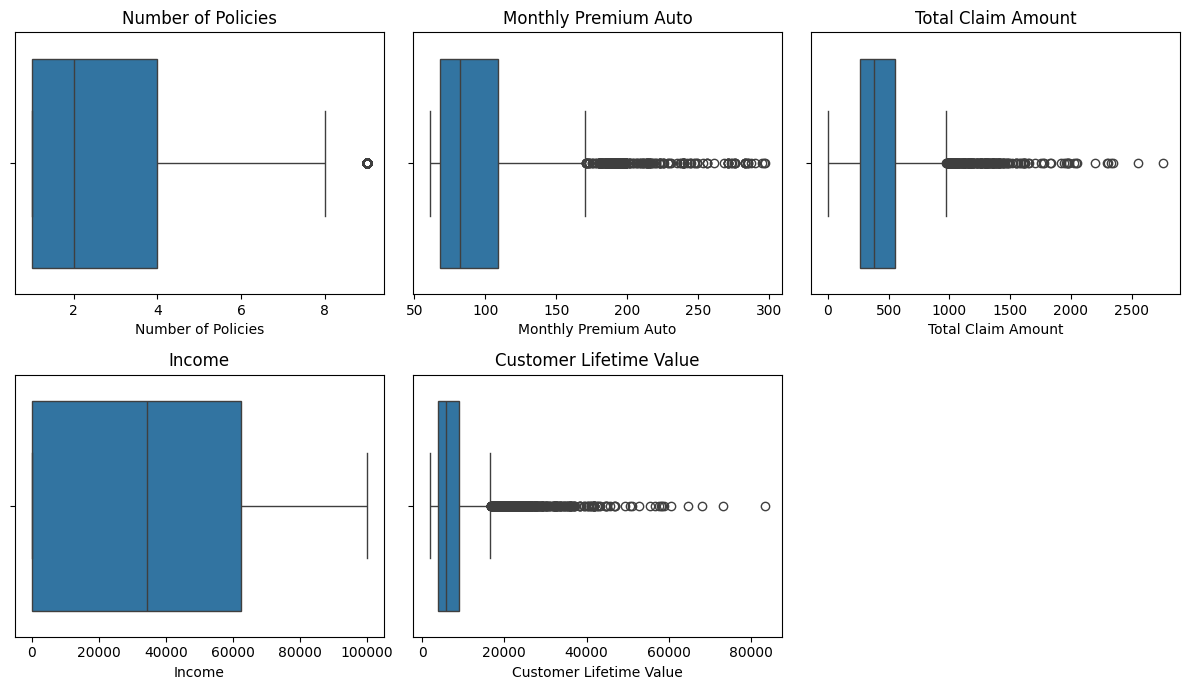

In [ ]:
posisi = 1
plt.figure(figsize = (12,7))

for tiap_kolom in numerik.columns:
  plt.subplot(2,3,posisi)
  sns.boxplot(df[tiap_kolom],orient = 'h')
  plt.title(tiap_kolom)
  posisi += 1
  plt.tight_layout()

#### IQR

In [ ]:
def calculate_outliers_iqr(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = round(q3 + whis,2)
    lower_bound = round(q1 - whis,2)
    outliers = len(data[(data > upper_bound) | (data < lower_bound)])
    percent_outliers = round((outliers / len(data)) * 100, 2)
    return outliers, percent_outliers, upper_bound, lower_bound

list_outliers_iqr = []
list_persentase_outliersiqr = []
jlh_data = []
list_upper_bound = []
list_lower_bound = []

for setiap_kolom in numerik.columns:
    data = numerik[setiap_kolom]
    outliers_iqr, percent_outliers_iqr, upper_bound, lower_bound = calculate_outliers_iqr(data)
    list_outliers_iqr.append(outliers_iqr)
    list_persentase_outliersiqr.append(percent_outliers_iqr)
    list_upper_bound.append(upper_bound)
    list_lower_bound.append(lower_bound)
    jlh_data.append(len(data))

outliers = pd.DataFrame({
    'kolom': numerik.columns,
    'panjang data': jlh_data,
    'jlh outliers': list_outliers_iqr,
    '%outliers': list_persentase_outliersiqr,
    'upper bound': list_upper_bound,
    'lower bound': list_lower_bound
    })
outliers

,kolom,panjang data,jlh outliers,%outliers,upper bound,lower bound
0,Number of Policies,5669,264,4.66,8.50,-3.50
1,Monthly Premium Auto,5669,275,4.85,170.50,6.50
2,Total Claim Amount,5669,265,4.67,974.57,-157.65
3,Income,5669,0,0.00,156160.00,-93696.00
4,Customer Lifetime Value,5669,499,8.80,16646.52,-3660.96


dari grafik boxplot dan IQR diatas, dapat dilihat bahwa outlier berada pasa posisi upper value dari masing-masing kolom. Semua kolom memiliki outlier kecuali kolom income, dengan outlier terbanyak berada pada data CLV sebanyak 8.80%.

### Korelasi

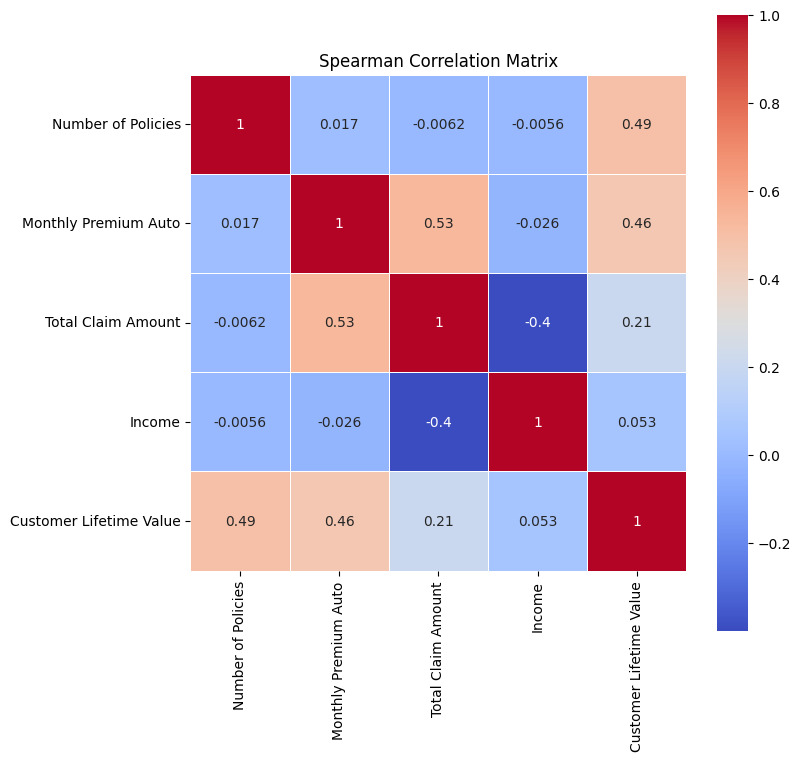

In [ ]:
plt.figure(figsize=(8,8))  # Set ukuran frame
sns.heatmap(numerik.corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

dari heatmap korelasi antar variabel numerik diatas, didapatkan beberapa informasi yaitu:
- `Number of Policies` memiliki korelasi positif moderat dengan `Customer Lifetime Value` (CLV) sebesar 0.49. Ini berarti semakin banyak polis yang dimiliki oleh pelanggan, semakin besar CLV-nya.
- `Monthly Premium Auto` menunjukkan korelasi moderat dengan `Total Claim Amount` (0.53) dan `Customer Lifetime Value` (0.46). Artinya, semakin tinggi premi bulanan, semakin besar jumlah klaim yang diajukan, dan semakin tinggi CLV.
- Total `Claim Amount` memiliki korelasi negatif dengan `Income` (-0.4), yang berarti ketika klaim lebih tinggi, pendapatan cenderung lebih rendah.
- `Income` memiliki korelasi yang sangat rendah dengan `Customer Lifetime Value` (0.053), sehingga pendapatan tampaknya tidak banyak berpengaruh terhadap CLV secara langsung.
- Korelasi antara `Income` dan `Total Claim Amount` cukup kuat (-0.4), menunjukkan bahwa semakin rendah pendapatan, semakin tinggi kemungkinan adanya jumlah klaim yang besar.

Jika memperhatikan independency dari tiap variabel, korelasi yang paling erat ditunjukan oleh variabel `Monthly Premium Amount` dengan `Total Claim Amount` dan mengindikasi adanya **multikolinearitas yang cukup tinggi** untuk kedua variabel independen tersebut.

### Multikolinearitas

**Multikolinearitas** terjadi ketika dua atau lebih **variabel independen** dalam model regresi **memiliki korelasi yang tinggi**, sehingga **sulit untuk menentukan pengaruh individual masing-masing variabel terhadap variabel dependen**.

Kondisi ini dapat menyebabkan koefisien regresi menjadi tidak stabil dan sulit diinterpretasikan.   

Uji multikolinearitas sering dilakukan menggunakan V**ariance Inflation Factor (VIF)**, di mana nilai VIF > 10 umumnya menunjukkan adanya multikolinearitas yang tinggi.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# buat function
def calc_vif(x):
    # dataframe kosong
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    # menghitung vig untuk setiap kolom nya
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [ ]:
calc_vif(numerik.drop(columns = 'Customer Lifetime Value')).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Monthly Premium Auto,10.991837
2,Total Claim Amount,6.741815
3,Income,2.699565
0,Number of Policies,2.211783


Insight dari tabel VIF diatas adalah:

- `Monthly Premium Auto` memiliki VIF tertinggi (10.99), yang menunjukkan adanya multikolinearitas yang signifikan/ ekstrim yang berarti bahwa variabel ini berkorelasi cukup kuat dengan variabel lain sehingga boleh untuk dilalukan dropping. manun, dalam konteks kolerasi model, akan dilakukan eksperimen lebih lanjut terkait variabel ini saat dilakukan modeling untuk dilihat pepengaruhnya terhadap performa model yang akan dibuat.
- `Total Claim Amount` juga memiliki VIF yang relatif tinggi (6.74), menunjukkan kemungkinan multikolinearitas sedang.
- `Income` dan `Number of Policies` memiliki VIF yang lebih rendah (< 5), yang menunjukkan tidak adanya multikolinearitas yang signifikan untuk kedua variabel ini.

## Variabel Kategorik

In [ ]:
categoric = df.select_dtypes(include = 'object')

### Deskriptif

In [ ]:
categoric.describe()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


1. `Vehicle Class`<br>
Kelas kendaraan yang paling sering digunakan oleh pelanggan adalah Four-Door Car, yang mencakup sekitar setengah dari total data (2858 dari 5669 pelanggan).
Hal ini menunjukkan bahwa banyak pelanggan menggunakan mobil berukuran sedang yang mungkin memiliki keterkaitan dengan kebutuhan mobilitas sehari-hari atau keluarga.

2. `Coverage`<br>
Sebagian besar pelanggan memilih cakupan asuransi Basic (3477 dari 5669), menunjukkan preferensi terhadap paket asuransi yang lebih terjangkau atau mungkin lebih sesuai dengan kebutuhan dasar pelanggan.
Ini bisa menjadi indikasi bahwa ada ruang untuk menawarkan upgrade pada cakupan yang lebih komprehensif.

3. `Renew Offer Type`<br> Mayoritas pelanggan menerima Offer1 sebagai penawaran perpanjangan polis (2292 dari 5669). Ini bisa mengindikasikan efektivitas penawaran tersebut, namun juga bisa menjadi peluang untuk mengevaluasi penawaran lainnya.

4. `Employment Status`<br> Sebagian besar pelanggan memiliki status pekerjaan Employed (3541 dari 5669), yang mengindikasikan bahwa kebanyakan pelanggan aktif secara ekonomi dan kemungkinan memiliki penghasilan yang stabil.
Namun, ada juga segmen yang Unemployed yang cukup besar, sehingga perlu mempertimbangkan penawaran yang lebih sesuai dengan segmen ini.

5. `Marital Status`<br> Sebagian besar pelanggan adalah Married (3305 dari 5669), menunjukkan bahwa banyak pelanggan mungkin membeli polis asuransi untuk keluarga atau perlindungan jangka panjang.

6. `Education`<br> Sebagian besar pelanggan memiliki tingkat pendidikan Bachelor (1703 dari 5669). Ini menunjukkan bahwa pelanggan asuransi umumnya berpendidikan tinggi, yang dapat mempengaruhi cara perusahaan mendesain komunikasi produk atau strategi pemasaran.

### Unique Value

Pengecekan Unique Value ini dulakukan agar mengetahui, metode apa yang sebaiknya digunakan saat melakukan encoding pada saat transformasi model.

In [ ]:
categoric.nunique().sort_values(ascending = False)

,0
Vehicle Class,6
EmploymentStatus,5
Education,5
Renew Offer Type,4
Coverage,3
Marital Status,3


data unik dari tiap variabel kategorik pada dataset ini tidak begitu banyak, beberapa insight yang dapat diambil yaitu:

- `Vehicle Class` memiliki 6 kategori berbeda, menunjukkan beragam jenis kendaraan yang diasuransikan oleh pelanggan. Variasi ini mungkin penting untuk analisis segmen pelanggan berdasarkan jenis kendaraan.

- `Employment Status` dan `Education` masing-masing memiliki 5 kategori, menunjukkan variasi yang cukup besar dalam tingkat pekerjaan dan pendidikan di antara pelanggan, yang bisa digunakan untuk menargetkan penawaran asuransi yang lebih relevan.

- `Renew Offer Type` memiliki 4 tipe, menunjukkan adanya beberapa opsi perpanjangan yang ditawarkan kepada pelanggan. Analisis efektivitas tiap tipe penawaran dapat membantu memahami preferensi pelanggan.

- `Coverage` dan `Marital Status` masing-masing hanya memiliki 3 kategori, menandakan opsi perlindungan yang lebih terbatas dan segmen pelanggan yang mayoritas menikah, yang bisa jadi peluang untuk diversifikasi produk atau penawaran

### Value Counts

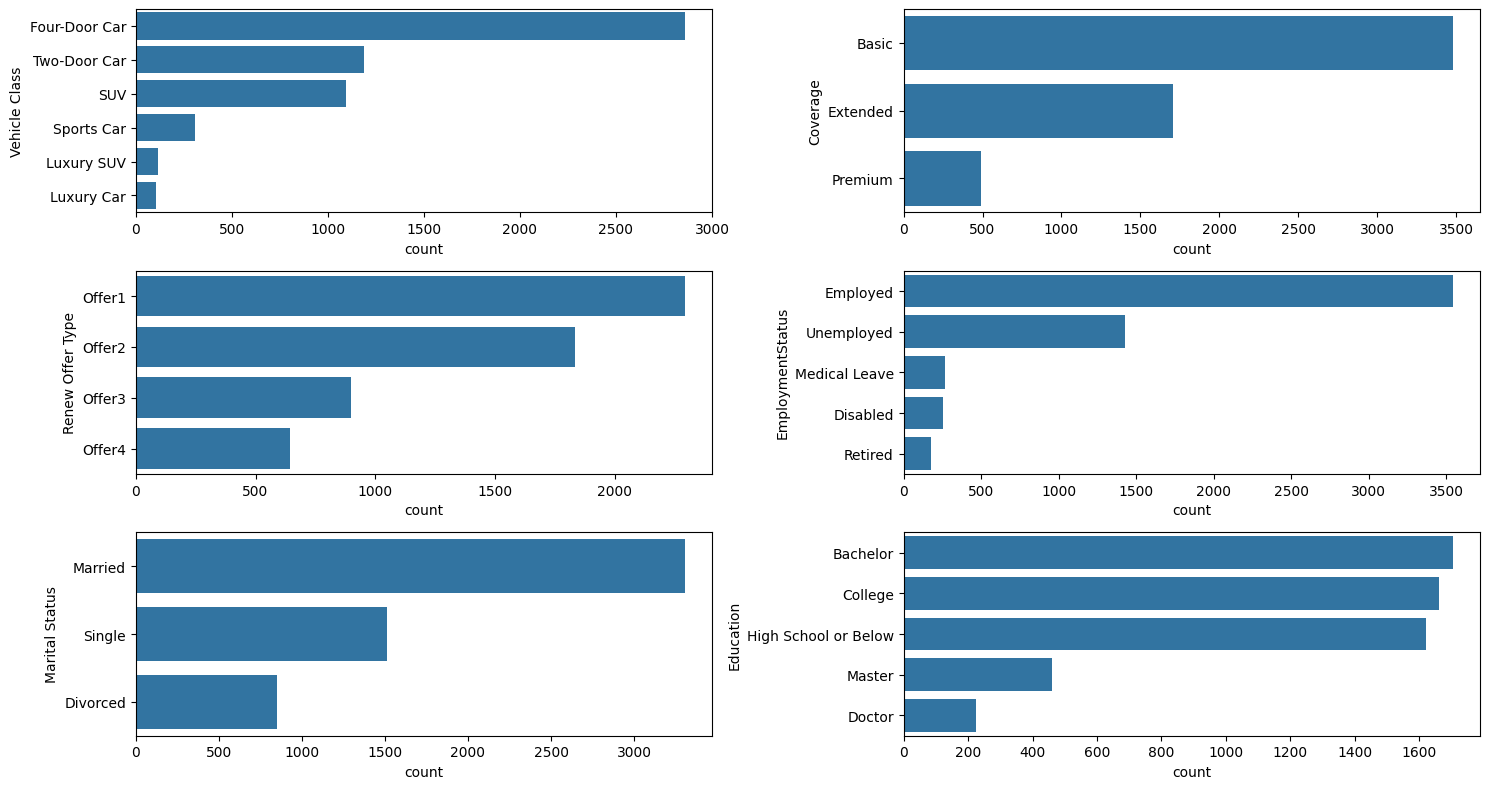

In [ ]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (15,8)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in categoric.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(3,2,posisi)
    sns.barplot(df[setiap_kolom].value_counts(), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

beberapa insight yang dapat disimpulkan dari  grafik diatas yakni:

- `Vehicle Class`: Mayoritas kendaraan dalam dataset adalah Four-Door Car dengan jumlah signifikan dibanding kelas lainnya. Hal ini menunjukkan preferensi pelanggan untuk mobil keluarga besar.

- `Coverage`: Lebih dari setengah pelanggan memilih Basic coverage, sedangkan Premium coverage memiliki jumlah pelanggan yang jauh lebih sedikit. Ini bisa menjadi indikator bahwa banyak pelanggan lebih memilih perlindungan yang lebih ekonomis.

- `Renew Offer Type`: Offer 1 dan Offer 2 mendominasi pilihan pembaruan polis. Ini menunjukkan bahwa kedua penawaran ini lebih menarik bagi pelanggan dibandingkan Offer 3 dan Offer 4.

- `Employment Status`: Sebagian besar pelanggan berstatus Employed, tetapi ada juga jumlah signifikan yang tidak bekerja (Unemployed), menunjukkan bahwa asuransi kendaraan tetap dibeli oleh individu yang tidak memiliki pekerjaan.

- `Marital Status`: Mayoritas pelanggan berada dalam status Married, dengan Single dan Divorced lebih sedikit. Ini mungkin mengindikasikan bahwa pelanggan yang sudah menikah lebih cenderung untuk memiliki kendaraan dan membeli polis asuransi.

- `Education`: Sebagian besar pelanggan memiliki tingkat pendidikan Bachelor dan College, menunjukkan bahwa sebagian besar pemegang polis memiliki latar belakang pendidikan yang cukup tinggi.

# Pembersihan Data

## Data Hilang

Pada proses data understanding, didapatkan data yang berpotensi bernilai sebagai missing value sebesar 25.21%. Hal ini perlu dilakukan verifikasi lebih lanjut.

In [ ]:
subset_df = df[df['Income'] == 0.0]

# Membuat pivot table
print('Data Status Pekerjaan dan Pendidikan Nasabah dengan Income = $0.0')
income_none = pd.pivot_table(
    subset_df,
    index=['EmploymentStatus', 'Education'],
    aggfunc='size',
    fill_value=0
).reset_index(name='Count')

total_count = income_none['Count'].sum()

# Menambahkan kolom persentase
income_none['Percentage %'] = (income_none['Count'] / total_count * 100).round(2)
income_none.sort_values(by='Count', ascending=False)

Data Status Pekerjaan dan Pendidikan Nasabah dengan Income = $0.0


,EmploymentStatus,Education,Count,Percentage %
3,Unemployed,High School or Below,486,34.01
0,Unemployed,Bachelor,430,30.09
1,Unemployed,College,422,29.53
4,Unemployed,Master,60,4.20
2,Unemployed,Doctor,31,2.17


dari tabel diatas, didapatkan informasi bahwa **seluruh nasabah dengan `Income` 0.0  memiliki status pekerjaan 'Tidak Bekerja'** dengan **status pendidikan** yang **beragam**.Lalu didapatkan beberapa insight seperti:

- jika dilihat berdasarkan data status pekerjaan, nasabah yang tidak memiliki pekerjaan sangat mungkin untuk tidak memiliki `income`.
- jika dilihat dari status pendidikan, mayoritas nasabah dengan `Income` 0.0 memiliki status pendidikan SMA-kebawah dengan persentase 34.01%.

Perlu dipertimbangkan bahwa pada beberapa kasus, seperti pelanggan yang sedang menganggur, mungkin masih memiliki akses ke sumber pendapatan alternatif, seperti tabungan, bantuan sosial, atau dukungan keluarga, sehingga mereka tetap mampu membayar layanan. <br>

Menurut artikel dari Insurify, [Car Insurance for Unemployed Drivers: What to Know ](https://insurify.com/car-insurance/driver/profession/unemployed/), status pengangguran tidak selalu mengakibatkan kenaikan pengeluaran yang signifikan, selama mereka tetap mampu melakukan pembayaran tepat waktu dan tidak memiliki masalah kredit besar. Jadi, meskipun tampak tidak masuk akal, ada kemungkinan adanya faktor-faktor lain yang mendukung kemampuan pembayaran pelanggan meskipun income mereka terlapor sebagai 0.0.

berdasarkan heatmap korelasi juga didapatkan bahwa data Income tidak mempengaruhi nilai CLV yang dimiliki nasabah

Maka, **rows data dengan income = 0** akan **dianggap sebagai data real dan akan tetap di pertahankan**

## Data Duplikat


Pada tahap data understanding, didapatkan informasi bahwa terdapat 618 data duplikat didalam dataset yang merupakan	10.9% dari total data.

In [ ]:
# Mengambil semua data yang memiliki duplikat (termasuk duplikat dan kemunculan pertama)
dupe_data = df[df.duplicated(keep=False)]

# Mengelompokkan berdasarkan semua kolom dan menghitung jumlah kemunculan
dupe_count = dupe_data.groupby(list(df.columns)).size().reset_index(name='Jumlah Duplikat')

# Menampilkan hasil
dupe_count

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,Jumlah Duplikat
0,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1,63.0,352.394515,19864.0,2359.423599,4
1,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2,74.0,523.888845,26057.0,8509.850887,5
2,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,3,65.0,312.000000,22886.0,5096.673223,5
3,Four-Door Car,Basic,Offer1,Employed,Divorced,Bachelor,9,69.0,331.200000,67798.0,5548.031892,4
4,Four-Door Car,Basic,Offer1,Employed,Divorced,Doctor,1,62.0,67.530904,36631.0,2491.317024,4
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Two-Door Car,Extended,Offer2,Retired,Married,Master,2,85.0,574.024018,19614.0,16301.967600,6
210,Two-Door Car,Premium,Offer1,Employed,Married,College,2,102.0,489.600000,88340.0,12280.766610,4
211,Two-Door Car,Premium,Offer1,Employed,Married,Master,2,119.0,109.906628,60880.0,14435.673650,2
212,Two-Door Car,Premium,Offer1,Employed,Single,Bachelor,1,103.0,494.400000,69379.0,4118.588554,2


**data duplikat** ini **tidak akan memberikan banyak variasi** untuk model, dan cenderung akan membuat overfit nantinya, sehingga seluruh **data duplikat akan di drop**

In [ ]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5051 entries, 0 to 5050
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5051 non-null   object 
 1   Coverage                 5051 non-null   object 
 2   Renew Offer Type         5051 non-null   object 
 3   EmploymentStatus         5051 non-null   object 
 4   Marital Status           5051 non-null   object 
 5   Education                5051 non-null   object 
 6   Number of Policies       5051 non-null   int64  
 7   Monthly Premium Auto     5051 non-null   float64
 8   Total Claim Amount       5051 non-null   float64
 9   Income                   5051 non-null   float64
 10  Customer Lifetime Value  5051 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 434.2+ KB


Dari sini terlihat, bahwa setelah dilakukan drop duplicate, **tersisa 5051 baris** data yang akan digunakan sebagai dataset **untuk modeling**

## Outlier

Seperti yang diketahui pada tahap **data understanding**, terdapat beberapa outlier pada kolom `Customer Lifetime Value`, `Monthly Premium Auto`, `Total Claim Amount`, `Number of Policies` seperti dibawah ini. Namun, kita akan melakukan percobaan dalam penilaian performa model, pada tahap tersebut akan dilihat performa model apakah lebih baik tanpa/ dengan outlier, dan keputusan dalam handling outlier akan diidasari oleh performa model hasil eksperimen tersebut.

In [ ]:
outliers.sort_values(by = 'jlh outliers', ascending = False).reset_index(drop = True)

,kolom,panjang data,jlh outliers,%outliers,upper bound,lower bound
0,Customer Lifetime Value,5669,499,8.80,16646.52,-3660.96
1,Monthly Premium Auto,5669,275,4.85,170.50,6.50
2,Total Claim Amount,5669,265,4.67,974.57,-157.65
3,Number of Policies,5669,264,4.66,8.50,-3.50
4,Income,5669,0,0.00,156160.00,-93696.00


# Data Splitting

Pada tahap ini akan dilakukan splitting data antara variabel fitur dan variabel target. Kemudian, dari masing2 data akan dilakkan splittting sesuai jumlah test size yang diinginkan. selanjutnya seluruh data pada kolom X akan disebut sebagai fitur dan variabel y akan disebut sebagai variabel target

In [ ]:
x = df.drop(columns = 'Customer Lifetime Value')
y = df['Customer Lifetime Value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 0,
)

- dilakukan split data yang dimiliki dengan proporsi data training 80% dari total data dan 20% sisanya adalah untuk data testing.
- Random_state dapat menggunakan angka berapapun untuk memastikan pengacakan yang dilakukan akan konsisten dan tidak akan berubah setiap kali dilakukan running code

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4040, 10), (1011, 10), (4040,), (1011,))

# Data Preparation

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Define ordinal mappings
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1,
                                  'Extended':2,
                                  'Premium':3,
                                  None:0}},

    {'col':'Education', 'mapping':{'High School or Below':1,
                                   'College':2,
                                   'Bachelor':3,
                                   'Master':4,
                                   'Doctor':5,
                                   None:0}},

    {'col':'Renew Offer Type', 'mapping' : {'Offer1':1,
                                            'Offer2':2,
                                            'Offer3':3,
                                            'Offer4':4, None:0}}
]

# Combine the encoders in ColumnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['EmploymentStatus', 'Marital Status']),
    ('binary', BinaryEncoder(), ['Vehicle Class']),
    ('ordinal', OrdinalEncoder(mapping=ordinal_mapping), ['Coverage', 'Education', 'Renew Offer Type']),
    ('scaler', RobustScaler(), x_train.select_dtypes(include='number').columns)
], remainder='passthrough')

# Check the transformer
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['EmploymentStatus', 'Marital Status']),
                                ('binary', BinaryEncoder(), ['Vehicle Class']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64},
                                                         {'col': 'Renew Offer '
                                                                 'Type',
                                                          'data_type': dtype('O'),
                                                          'mapping': Offer1    1
Offer2    2
Offer3    3
Offer4    4
None      0
dtype: int64}]),
                                 ['Coverage', 'Education', 'Renew Offer Type']),
                                ('scaler', RobustScaler(),
                                 Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income'],
      dtype='object'))])

**PERBAIKI, DISINI U PAKAI ORDINAL disini dilakukan encoding tanpa memperhitungkan urutan/ menggunakan ordinal encoder**

pada kode diatas, dilakukan preparation transformer dengan pertimbangan dibawah ini:
- seluruh data kategorik perlu dilakukan encoding sebelung dilalukan modeling. Pemilihan metode encoding untuk tiap fitur didasari atas:
  - `Employment Status`,	`Marital Status` dilakukan encoding menggunakan `onehot Encoder` karena setiap fitur tersebut memiliki fitur tidak lebih dari 5 unique value. `Onehit dipilih untuk fitur diatas karena menghasilkan jumlah kolom yang tetap kecil dan manageable, tanpa menambah kompleksitas data secara signifikan. Ini membantu menjaga interpretabilitas dan menghindari overfitting (untuk fitur >5 unique value)
  - `Vehhicle Class` eenggunakan `BinaryEncoder` mengurangi dimensi data secara signifikan, membantu mencegah curse of dimensionality dan memelihara efisiensi model.
  - `Coverage`,	`Renew Offer Type`dan `Education` dilakukan encoding menggunakan `Ordinal Encoder` yang mempertimbangkan urutan dari urutan data dari masing-masing feature.
- Data numerik perlu dilakukan scaling agar setiap fitur memiliki skala yang seimbang, sehingga menghindari dominasi fitur dengan nilai besar dan memastikan algoritma regresi dapat bekerja lebih efektif.
-  Pemilihan metode scaling `RobustScaler` pada data numerik karena sebagian besar data numerik dalam dataset mengandung outlier, RobustScaler lebih sesuai untuk menormalkan distribusi data tanpa terpengaruh secara signifikan oleh outlier karena menggunakan IQR dan median dalam proses scalingnya.
<BR>
<BR>

**RUMUS ROBUSTSCALER**
<BR>
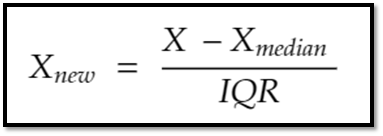

Pemilihan RobustScaler sebagai scaler dikarenakan pada dataset terdapat outliers yang signifikan, dan RobustScaler tahan terhadap outliers. Dapat dilihat pada formula diatas, RobustScaler menggunakan Median dan IQR dalam scalingnya sehingga dapat mengurangi dampak outliers saat melakukan scaling dan membuatnya lebih stabil.

# Modeling

## Rule Based Model

Sebelumnya perusahaan telah membuat rule based model (tanpa menggunakan Machine Learning), dengan hanya menggunakan 6 fitur dengan sistem `if-then` sebagai parameter dalam penentuan CLV yakni `Monthly Premium Auto` dan `Income`, `Number Of Policies`, `Employment Status`, `Education`, dan `Total Claim Amount`.

In [ ]:
def rule_based_model(df):
    income = df['Income']
    premium = df['Monthly Premium Auto']
    policies = df['Number of Policies']
    employment_status = df['EmploymentStatus']
    education_level = df['Education']
    claims = df['Total Claim Amount']

    if (income > 60000) and (premium > 80) and (policies >= 3) and (employment_status == 'Employed') and (claims < 500) and (education_level in ['Bachelor', 'Master']):
        return 12000
    elif (income > 40000) and (premium > 60) and (policies >= 2) and (employment_status in ['Employed', 'Retired']) and (claims < 1000):
        return 8000
    elif (income > 30000) and (premium > 50) and (policies >= 1) and (employment_status in ['Unemployed', 'Employed']) and (claims < 2000):
        return 5000
    elif (income <= 30000) and (premium <= 50) and (policies < 2) and (employment_status == 'Unemployed') and (claims > 2000) and (education_level in ['High School', 'None']):
        return 2000
    else:
        return 3500

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Training scores
y_pred_train_rule_based = x_train.apply(rule_based_model, axis=1)
mae_train = mean_absolute_error(y_train, y_pred_train_rule_based)

# Testing scores
y_pred_test_rule_based = x_test.apply(rule_based_model, axis=1)
mae_test = mean_absolute_error(y_test, y_pred_test_rule_based)

# R-squared
r2 = r2_score(y_test, y_pred_test_rule_based)

In [ ]:
df0 = pd.DataFrame({
    'model': ['Rule Based'],
    'train_MAE_mean': [mae_train],
    'train_MAE_std': None,
    'test_MAE_mean': [mae_test],
    'R2': [r2]
})
df0

,model,train_MAE_mean,train_MAE_std,test_MAE_mean,R2
0,Rule Based,4206.655271,None,4161.138756,-0.15156


## Feature Engineering

akan dilakukan beberapa percobaan dengan beberapa algoritma untuk modeling guna menemukan model terbaik dengan nilai metrics evaluation terbaik

### Benchmark Model

- Linear Regression (lr) – Model regresi linier dasar tanpa regularisasi.
- KNeighborsRegressor (knn) – Algoritma K-Nearest Neighbors untuk regresi.
- DecisionTreeRegressor (dt) – Algoritma pohon keputusan untuk regresi.
- Lasso (lasso) – Regresi linear dengan regularisasi L1 (Lasso).
- Ridge (rid) – Regresi linear dengan regularisasi L2 (Ridge).
- Stacking Regressor (stacking) – Teknik ensemble di mana model dasar digunakan sebagai input untuk meta-model, yang juga merupakan regresi linier di sini.
- RandomForestRegressor (rf) – Algoritma bagging menggunakan Random Forest.
- XGBRegressor (xgb) – Algoritma boosting menggunakan XGBoost.
- GradientBoostingRegressor (gbr) – Algoritma boosting menggunakan Gradient Boosting.

In [ ]:
# Benchmark Model
# base model
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 0)

# regularization
lasso = Lasso(alpha = 0.001)
rid = Ridge(alpha = 0.001)

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn) ])

meta_model = LinearRegression()
stacking = StackingRegressor(base_model,meta_model)

# bagging
rf = RandomForestRegressor(random_state= 0)

# boosting
xgb = XGBRegressor(random_state= 0)
gbr = GradientBoostingRegressor(random_state= 0)

### Experiment 1: Base Model

Pada tahap ini akan dilakkan modeling menggunakan base model dengan menggunakan mode default dari masing2 opsi model yang dipilih saat benchmarking model tanpa perlakuan khusus/ percobaan modifikasi pada dataset

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from imblearn.pipeline import Pipeline
import pandas as pd

scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'r2': 'r2'}


list_mean_RMSE = []
list_std_RMSE = []

list_mean_MAE = []
list_std_MAE = []

list_mean_MAPE = []
list_std_MAPE = []

list_mean_R2 = []
list_std_R2 = []

list_test_score = []


models = [lr, dt, knn, lasso, rid, stacking, rf, gbr, xgb]
model_names = ['Linear Regression', 'Decision Tree', 'KNN', 'Lasso', 'Ridge', 'Stacking', 'Random Forest', 'Gradient Boost', 'XGBoost']

for i in models:
    pipeline = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    score_dict = {'rmse': [], 'mae': [], 'mape': [], 'r2': []}

    for metric, metric_name in scoring.items():
        score = cross_val_score(pipeline,
                                   x_train,
                                   y_train,
                                   cv=KFold(n_splits=5),
                                   scoring=metric_name)
        score_dict[metric].append(abs(score.mean()) if 'neg' in metric_name else score.mean())
        score_dict[metric].append(abs(score.std()))


    list_mean_RMSE.append(score_dict['rmse'][0])
    list_std_RMSE.append(score_dict['rmse'][1])

    list_mean_MAE.append(score_dict['mae'][0])
    list_std_MAE.append(score_dict['mae'][1])

    list_mean_MAPE.append(score_dict['mape'][0])
    list_std_MAPE.append(score_dict['mape'][1])

    list_mean_R2.append(score_dict['r2'][0])
    list_std_R2.append(score_dict['r2'][1])

    pipeline.fit(x_train, y_train)
    ypred_test = pipeline.predict(x_test)

    test_scoreMAE = mean_absolute_error(y_test, ypred_test)
    list_test_score.append(test_scoreMAE)

In [ ]:
df1 = pd.DataFrame({
    'model': model_names,
    'train_MAE_mean': list_mean_MAE,
    'train_MAE_std': list_std_MAE,
    'train_RMSE_mean': list_mean_RMSE,
    'train_RMSE_std': list_std_RMSE,
    'train_MAPE_mean': list_mean_MAPE,
    'train_MAPE_std': list_std_MAPE,
    'mean_R2': list_mean_R2,
    'std_R2': list_std_R2,
    'test_MAE_mean': list_test_score
}).round(2)

df1.sort_values(by='test_MAE_mean')

,model,train_MAE_mean,train_MAE_std,train_RMSE_mean,train_RMSE_std,train_MAPE_mean,train_MAPE_std,mean_R2,std_R2,test_MAE_mean
6,Random Forest,1715.29,139.62,4167.46,334.40,0.13,0.01,0.63,0.05,1700.06
7,Gradient Boost,1793.65,95.24,3927.48,325.23,0.15,0.01,0.68,0.02,1792.88
1,Decision Tree,2037.43,203.83,5608.65,567.58,0.15,0.02,0.33,0.10,1877.79
8,XGBoost,2217.28,103.85,4433.76,362.54,0.24,0.01,0.58,0.06,2151.78
5,Stacking,2372.60,131.13,4879.93,520.17,0.29,0.01,0.50,0.03,2348.75
2,KNN,3961.57,137.51,6676.17,348.33,0.58,0.04,0.06,0.07,3844.77
0,Linear Regression,3912.11,156.64,6282.05,450.59,0.60,0.03,0.17,0.02,3877.03
3,Lasso,3912.11,156.64,6282.05,450.59,0.60,0.03,0.17,0.02,3877.03
4,Ridge,3912.11,156.64,6282.05,450.59,0.60,0.03,0.17,0.02,3877.03


### Experiment 2: Remove Outlier

Pada tahap pengecekan outliers sebelumnya, diketahui terdapat fitur-fitur yang memiliki outiers pada dataset. Maka akan dilakukan percobaan pengecekan performa model dengan menghilangkan outlier.


In [ ]:
def remove_outliers(data):
    for setiap_kolom in data.select_dtypes(include='number').columns:
        q3 = data[setiap_kolom].quantile(0.75)
        q1 = data[setiap_kolom].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        numerik = data[(data[setiap_kolom] <= upper_bound) & (data[setiap_kolom] >= lower_bound)]

    return numerik

In [ ]:
df_without_outliers = remove_outliers(df)

Berikut adalah boxplot data sebelum dilakukan removing outliers

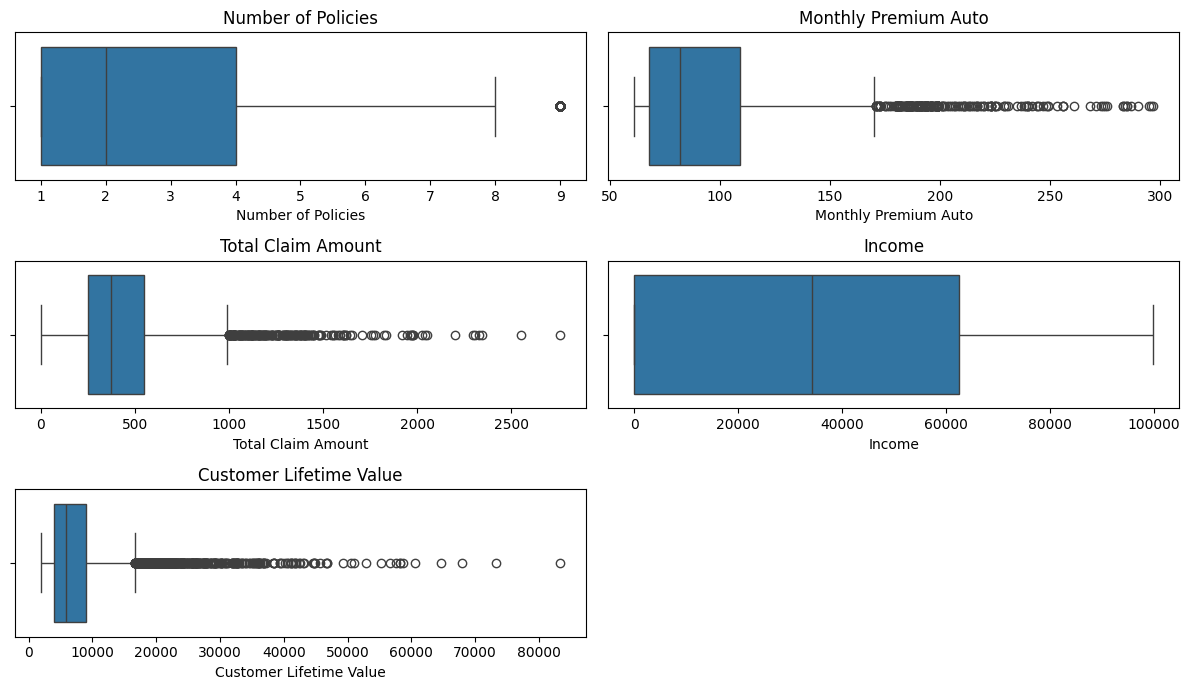

In [ ]:
numerik = df_without_outliers.select_dtypes(include = 'number')

posisi = 1
plt.figure(figsize = (12,7))

for tiap_kolom in numerik.columns:
  plt.subplot(3,2,posisi)
  sns.boxplot(df[tiap_kolom],orient = 'h')
  plt.title(tiap_kolom)
  posisi += 1
  plt.tight_layout()

dibawah ini adalah boxplot setelah dilakukan removing outliers

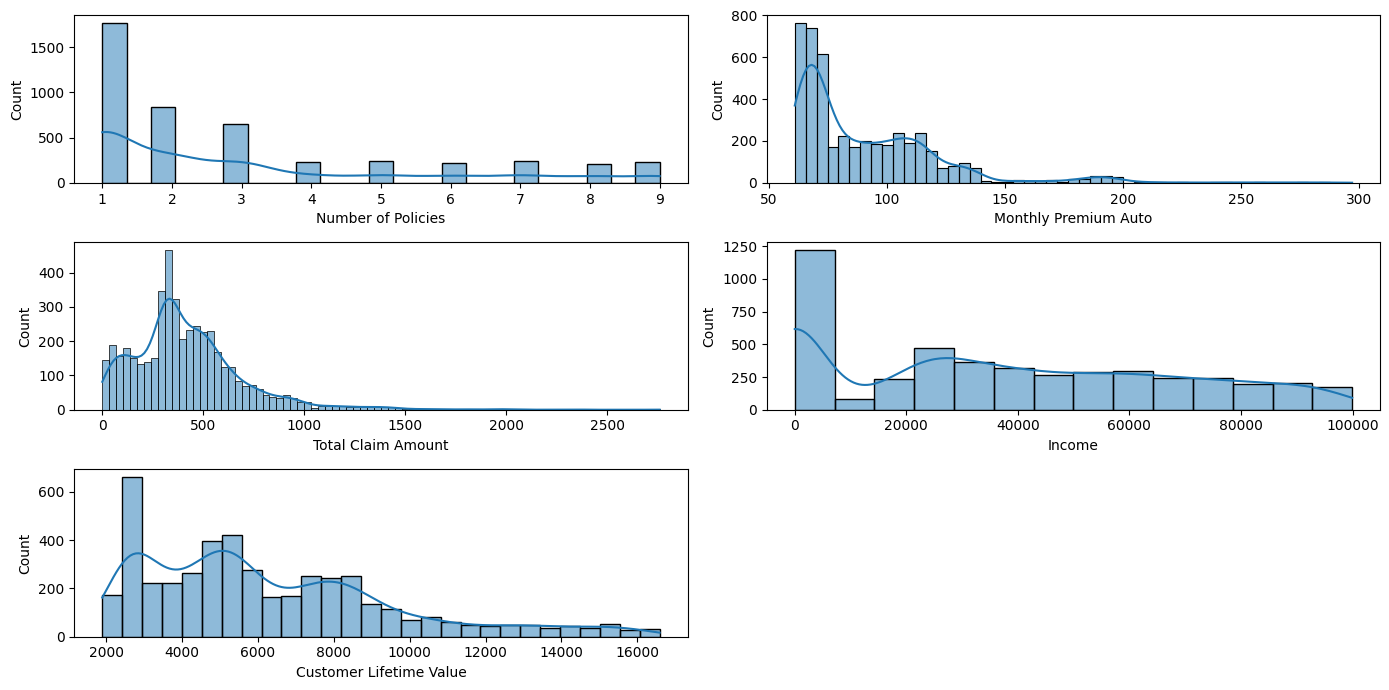

In [ ]:
plt.figure(figsize = (14,7))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(3,2,posisi)
    sns.histplot(df_without_outliers[setiap_kolom], kde=True)
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

In [ ]:
df.shape[0]

5051

In [ ]:
df_without_outliers.shape[0]

4602

In [ ]:
(df_without_outliers.shape[0]/df.shape[0])*100

91.11067115422688

pada beberapa kode diatas, telah dilakukan penghapusan outliers yang berjumlah 8.89% data telah dihapus dari dataset dan tersisa 91.11% yang akan kita gunakan dalam percobaan melihat performa model tanpa outliers

In [ ]:
x_no_outliers = df_without_outliers.drop(columns = 'Customer Lifetime Value')
y_no_outliers = df_without_outliers['Customer Lifetime Value']
x_train_no_outliers, x_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    x_no_outliers,
    y_no_outliers,
    test_size = 0.2,
    random_state = 0,
)

In [ ]:
x_train_no_outliers.shape, x_test_no_outliers.shape, y_train_no_outliers.shape, y_test_no_outliers.shape

((3681, 10), (921, 10), (3681,), (921,))

In [ ]:
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'r2': 'r2'}  # Adding R-squared scoring

# Initialize lists to store results
list_mean_RMSE = []
list_std_RMSE = []

list_mean_MAE = []
list_std_MAE = []

list_mean_MAPE = []
list_std_MAPE = []

list_mean_R2 = []
list_std_R2 = []

list_test_score = []

# Models to evaluate (assuming these are already defined)
models = [lr, dt, knn, lasso, rid, stacking, rf, gbr, xgb]
model_names = ['Linear Regression', 'Decision Tree', 'KNN', 'Lasso', 'Ridge', 'Stacking', 'Random Forest', 'Gradient Boost', 'XGBoost']

# Iterate over each model and perform scoring for all metrics in one loop
for i in models:
    pipeline = Pipeline([
        ('transformer', transformer),  # Ensure transformer is defined
        ('model', i)
    ])

    # Initialize dictionaries to store mean and std scores
    score_dict = {'rmse': [], 'mae': [], 'mape': [], 'r2': []}

    for metric, metric_name in scoring.items():
        score = cross_val_score(pipeline,
                                   x_train_no_outliers,
                                   y_train_no_outliers,
                                   cv=KFold(n_splits=5),
                                   scoring=metric_name)
        score_dict[metric].append(abs(score.mean()) if 'neg' in metric_name else score.mean())
        score_dict[metric].append(abs(score.std()))

    # Append results to the corresponding lists
    list_mean_RMSE.append(score_dict['rmse'][0])
    list_std_RMSE.append(score_dict['rmse'][1])

    list_mean_MAE.append(score_dict['mae'][0])
    list_std_MAE.append(score_dict['mae'][1])

    list_mean_MAPE.append(score_dict['mape'][0])
    list_std_MAPE.append(score_dict['mape'][1])

    list_mean_R2.append(score_dict['r2'][0])
    list_std_R2.append(score_dict['r2'][1])

        # Prediksi
    pipeline.fit(x_train_no_outliers, y_train_no_outliers)
    ypred_test_no_outliers = pipeline.predict(x_test_no_outliers)

    test_scoreMAE = mean_absolute_error(y_test_no_outliers, ypred_test_no_outliers)
    list_test_score.append(test_scoreMAE)

In [ ]:
# Storing all results in a DataFrame
print('Resume Score: Revome Outliers')

df2 = pd.DataFrame({
    'model': model_names,
    'train_MAE_mean': list_mean_MAE,
    'train_MAE_std': list_std_MAE,
    'train_RMSE_mean': list_mean_RMSE,
    'train_RMSE_std': list_std_RMSE,
    'train_MAPE_mean': list_mean_MAPE,
    'train_MAPE_std': list_std_MAPE,
    'mean_R2': list_mean_R2,
    'std_R2': list_std_R2,
    'test_MAE_mean': list_test_score
}).round(2)

df2.sort_values(by='test_MAE_mean')

Resume Score: Revome Outliers


,model,train_MAE_mean,train_MAE_std,train_RMSE_mean,train_RMSE_std,train_MAPE_mean,train_MAPE_std,mean_R2,std_R2,test_MAE_mean
6,Random Forest,365.49,31.76,920.50,106.24,0.04,0.00,0.92,0.02,397.43
7,Gradient Boost,377.56,25.94,882.87,94.58,0.05,0.00,0.93,0.02,402.34
1,Decision Tree,477.40,39.27,1321.87,92.41,0.06,0.00,0.84,0.02,438.56
8,XGBoost,440.39,38.30,973.32,120.21,0.07,0.00,0.91,0.02,478.72
5,Stacking,524.56,38.80,1250.59,93.85,0.07,0.00,0.86,0.02,540.61
2,KNN,1897.96,100.75,2764.78,144.66,0.35,0.01,0.30,0.06,1867.74
0,Linear Regression,2076.22,77.73,2758.26,122.61,0.38,0.01,0.31,0.05,2099.49
3,Lasso,2076.22,77.73,2758.26,122.61,0.38,0.01,0.31,0.05,2099.49
4,Ridge,2076.22,77.73,2758.26,122.61,0.38,0.01,0.31,0.05,2099.49


### Experiment 3: Rare Label

pada tahap ini akan dilakukan eksperimen dengan rare label.
Label dengan jumlah dibawah 0.05 pada tiap feature akan diconsidered sebagai pada tiap rare label. akan dilakukan handling dengan menjadikan feature2 dibawah trashold menjadi 1 label saja.<br>
<br>**Mengapa perlu ditangani?**<br>
Kurangnya representasi: Label dengan frekuensi rendah tidak memberikan cukup informasi untuk dipelajari oleh model.
Overfitting: Jika rare label tetap dipertahankan, model bisa terlalu spesifik terhadap label tersebut, namun gagal generalisasi.

Rare labels in Vehicle Class: ['Luxury SUV', 'Luxury Car']
Rare labels in EmploymentStatus: ['Medical Leave', 'Disabled', 'Retired']


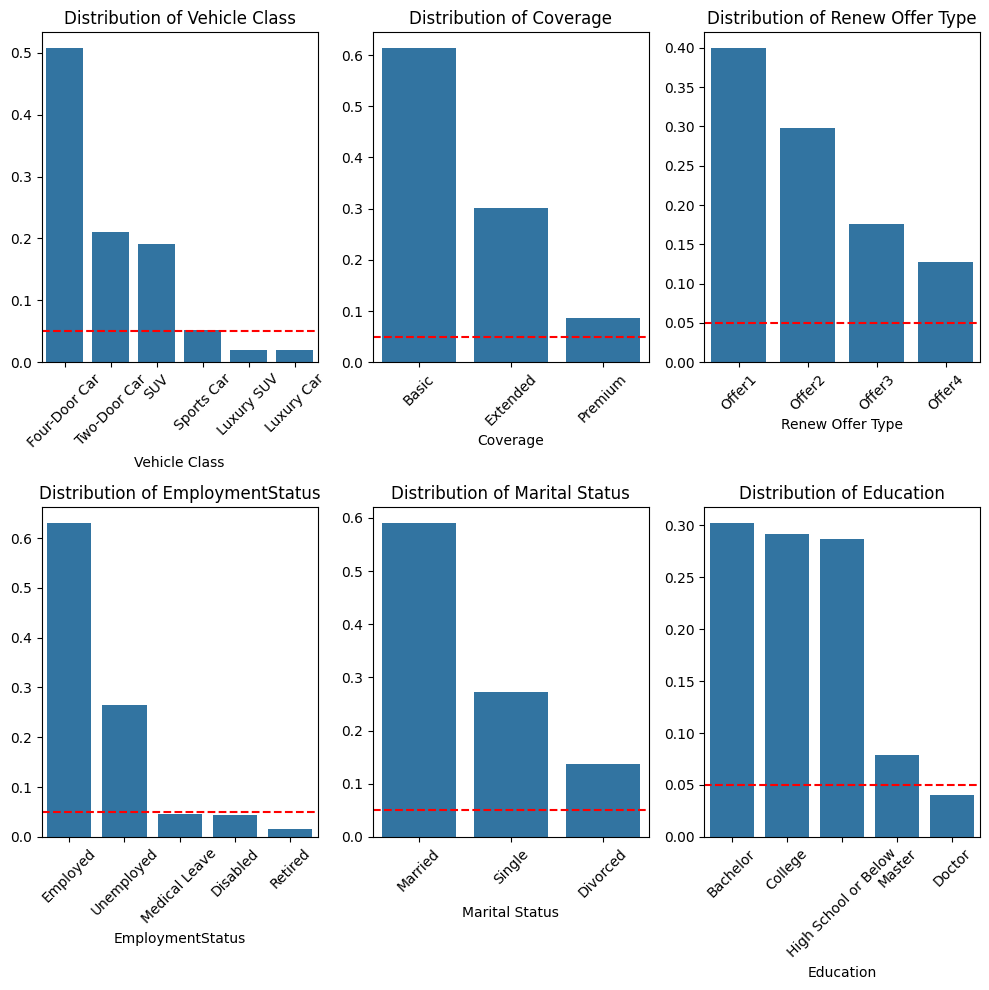

In [ ]:
# persebaran label pada tiap feature kategorik
posisi =1
plt.figure(figsize=(10, 10))  # (horizontal, vertikal)
rare_label_columns = []
rare_threshold = 0.05
for feature in categoric:
    # Hitung proporsi dari setiap kategori
    value_counts = df[feature].value_counts(normalize=True)

    # Tampilkan distribusi kategori
    plt.subplot(2, 3, posisi)
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.axhline(y=rare_threshold, color='red', linestyle='--')
    posisi += 1
    plt.tight_layout()

    # Cek rare labels berdasarkan threshold
    rare_labels = value_counts[value_counts < rare_threshold].index

    if len(rare_labels) > 1:
      rare_label_columns.append(feature)
      print(f"Rare labels in {feature}: {list(rare_labels)}")

terlihat diatas, terdapat 3 feature yang memiliki *Rare label*, yakni Vehicle Class, Employment Status dan Education. Pada percobaan ini, seluruh feature dengan rare label >1 akan dikelompokkan menjadi 1 dan diberi label dengan label `others`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom kategorikal
categoric = df.select_dtypes(include=['object']).columns

# Parameter threshold untuk mendefinisikan rare label (misalnya kategori yang muncul kurang dari 5%)
rare_threshold = 0.05

# Menangani rare label dengan menggabungkan menjadi kategori 'Other'
df_rare = df.copy()  # Buat salinan dataset asli
for feature in rare_label_columns:
    # Identifikasi kembali rare label untuk feature saat ini
    value_counts = df[feature].value_counts(normalize=True)
    rare_labels = value_counts[value_counts < rare_threshold].index

    # Ganti rare label menjadi 'Other', kecuali jika hanya ada satu label yang di bawah threshold
    df_rare[feature] = df_rare[feature].apply(lambda x: 'Other' if x in rare_labels else x)

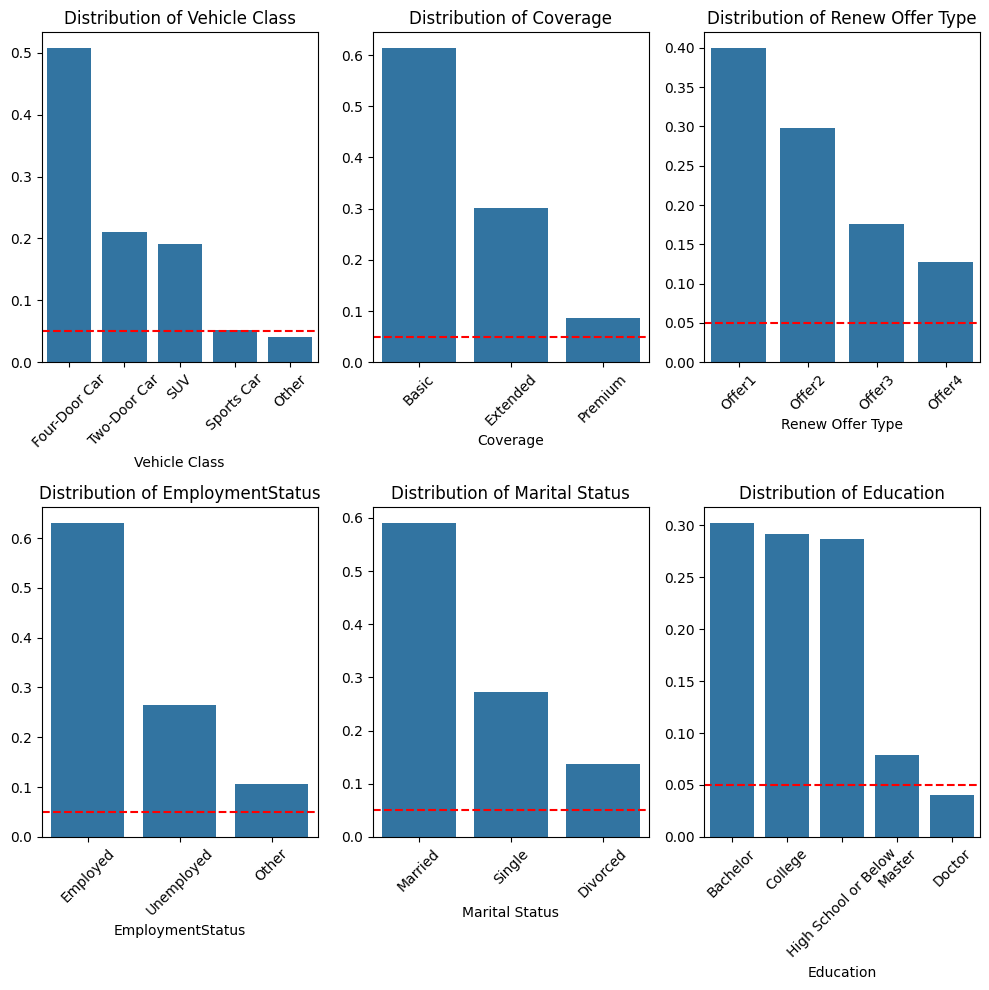

In [ ]:
# persebaran label pada tiap feature kategorik after handling RL

posisi =1
plt.figure(figsize=(10,10))  # (horizontal, vertikal)
for feature in categoric:
    # Hitung proporsi dari setiap kategori
    value_counts = df_rare[feature].value_counts(normalize=True)

    # Tampilkan distribusi kategori
    plt.subplot(2, 3, posisi)
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.axhline(y=rare_threshold, color='red', linestyle='--')
    posisi += 1
    plt.tight_layout()

In [ ]:
# Hitung jumlah kategori unik sebelum dan setelah handling rare label
cat = df.select_dtypes(include='object')
cat_rare = df_rare.select_dtypes(include='object')

cat_unique = cat.nunique()
cat_rare_unique = cat_rare.nunique()

# Gabungkan hasil perhitungan menjadi satu DataFrame
comparison_df = pd.DataFrame({
    'Before': cat.nunique(),
    'After': cat_rare.nunique()
})

comparison_df

,Before,After
Vehicle Class,6,5
Coverage,3,3
Renew Offer Type,4,4
EmploymentStatus,5,3
Marital Status,3,3
Education,5,5


karena seluruh feature memiliki label < 5, maka semua feature kategorik akan dilakukan encoding menggunakan `onehot encoder`

In [ ]:
x_nrl = df_rare.drop(columns = 'Customer Lifetime Value')
y_nrl = df_rare['Customer Lifetime Value']

x_train_nrl, x_test_nrl, y_train_nrl, y_test_nrl = train_test_split(
    x_nrl,
    y_nrl,
    test_size = 0.2,
    random_state = 0,
)

In [ ]:
x_train_nrl.shape, x_test_nrl.shape, y_train_nrl.shape, y_test_nrl.shape

((4040, 10), (1011, 10), (4040,), (1011,))

In [ ]:
transformer3 = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'), ['EmploymentStatus',	'Marital Status','Vehicle Class']),
    ('ordinal', OrdinalEncoder(mapping=ordinal_mapping), ['Coverage', 'Education', 'Renew Offer Type']),
    ('scaler', RobustScaler(), x_train_nrl.select_dtypes(include = 'number').columns)
], remainder = 'passthrough')
transformer3

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['EmploymentStatus', 'Marital Status',
                                  'Vehicle Class']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64},
                                                         {'col': 'Renew Offer '
                                                                 'Type',
                                                          'data_type': dtype('O'),
                                                          'mapping': Offer1    1
Offer2    2
Offer3    3
Offer4    4
None      0
dtype: int64}]),
                                 ['Coverage', 'Education', 'Renew Offer Type']),
                                ('scaler', RobustScaler(),
                                 Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income'],
      dtype='object'))])

In [ ]:
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'r2': 'r2'}  # Adding R-squared scoring

# Initialize lists to store results
list_mean_RMSE = []
list_std_RMSE = []

list_mean_MAE = []
list_std_MAE = []

list_mean_MAPE = []
list_std_MAPE = []

list_mean_R2 = []
list_std_R2 = []

list_test_score = []

# Models to evaluate (assuming these are already defined)
models = [lr, dt, knn, lasso, rid, stacking, rf, gbr, xgb]
model_names = ['Linear Regression', 'Decision Tree', 'KNN', 'Lasso', 'Ridge', 'Stacking', 'Random Forest', 'Gradient Boost', 'XGBoost']

# Iterate over each model and perform scoring for all metrics in one loop
for i in models:
    pipeline = Pipeline([
        ('transformer', transformer3),  # Ensure transformer is defined
        ('model', i)
    ])

    # Initialize dictionaries to store mean and std scores
    score_dict = {'rmse': [], 'mae': [], 'mape': [], 'r2': []}

    for metric, metric_name in scoring.items():
        score = cross_val_score(pipeline,
                                   x_train_nrl,
                                   y_train_nrl,
                                   cv=KFold(n_splits=5),
                                   scoring=metric_name)
        score_dict[metric].append(abs(score.mean()) if 'neg' in metric_name else score.mean())
        score_dict[metric].append(abs(score.std()))

    # Append results to the corresponding lists
    list_mean_RMSE.append(score_dict['rmse'][0])
    list_std_RMSE.append(score_dict['rmse'][1])

    list_mean_MAE.append(score_dict['mae'][0])
    list_std_MAE.append(score_dict['mae'][1])

    list_mean_MAPE.append(score_dict['mape'][0])
    list_std_MAPE.append(score_dict['mape'][1])

    list_mean_R2.append(score_dict['r2'][0])
    list_std_R2.append(score_dict['r2'][1])

    # Prediksi
    pipeline.fit(x_train_nrl, y_train_nrl)
    ypred_test_nrl = pipeline.predict(x_test_nrl)

    test_scoreMAE = mean_absolute_error(y_test_nrl, ypred_test_nrl)
    list_test_score.append(test_scoreMAE)

In [ ]:
# Storing all results in a DataFrame
df3 = pd.DataFrame({
    'model': model_names,
    'train_MAE_mean': list_mean_MAE,
    'train_MAE_std': list_std_MAE,
    'train_RMSE_mean': list_mean_RMSE,
    'train_RMSE_std': list_std_RMSE,
    'train_MAPE_mean': list_mean_MAPE,
    'train_MAPE_std': list_std_MAPE,
    'mean_R2': list_mean_R2,
    'std_R2': list_std_R2,
    'test_MAE_mean': list_test_score
}).round(2)

df3.sort_values(by='test_MAE_mean', ascending=True)

,model,train_MAE_mean,train_MAE_std,train_RMSE_mean,train_RMSE_std,train_MAPE_mean,train_MAPE_std,mean_R2,std_R2,test_MAE_mean
6,Random Forest,1716.63,137.42,4150.75,310.91,0.13,0.01,0.63,0.05,1699.49
7,Gradient Boost,1788.57,98.75,3922.51,308.38,0.15,0.01,0.68,0.02,1806.87
1,Decision Tree,2039.29,118.81,5595.93,443.56,0.15,0.01,0.34,0.07,1987.94
8,XGBoost,2193.11,139.99,4418.45,352.99,0.23,0.01,0.58,0.07,2105.41
5,Stacking,2378.76,85.77,4856.66,447.29,0.29,0.01,0.51,0.02,2361.24
2,KNN,3951.23,143.86,6660.46,367.50,0.58,0.03,0.06,0.06,3871.02
0,Linear Regression,3909.96,154.70,6284.46,452.65,0.60,0.03,0.17,0.02,3872.05
3,Lasso,3909.96,154.70,6284.46,452.65,0.60,0.03,0.17,0.02,3872.05
4,Ridge,3909.96,154.70,6284.46,452.65,0.60,0.03,0.17,0.02,3872.05


### Experiment 4: Binning

Pada tahap ini akan dilakukan eksperimen untuk melihat performa model dengan melakukan binning pada fitur dengan korelasi terhadap variabel dependent/target yang tinggi

In [ ]:
numerical_features = df.select_dtypes(include='number').columns

correlation = df[numerical_features].corrwith(df['Customer Lifetime Value'])
print(correlation.sort_values(ascending=False))

Customer Lifetime Value    1.000000
Monthly Premium Auto       0.417090
Total Claim Amount         0.211937
Income                     0.036998
Number of Policies         0.022143
dtype: float64


Didapatkan 1 variabel dengan korelasi tinggi dengan data Target/ CLV yaitu `Monthly Premium Auto`. Makam fitur ini akan dilakukan binning melalui pipeline baru, dan akan menggunakan transformer yang disesuaikan dengan kondisi tiap fitur pada tahap eksperimen

In [ ]:
feature_bins_pipe = Pipeline([
              ('bins', KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')),
              ('scaler', RobustScaler())
])

In [ ]:
transformer4 = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'), ['EmploymentStatus',	'Marital Status']),
    ('binary', BinaryEncoder(), ['Vehicle Class']),
    ('ordinal', OrdinalEncoder(mapping=ordinal_mapping), ['Coverage', 'Education', 'Renew Offer Type']),
    ('bins', feature_bins_pipe, ['Monthly Premium Auto']),
    ('scaler', RobustScaler(), ['Number of Policies', 'Total Claim Amount', 'Income'])
], remainder = 'passthrough')
transformer4

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(drop='first'),
                                 ['EmploymentStatus', 'Marital Status']),
                                ('binary', BinaryEncoder(), ['Vehicle Class']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapp...
                                                         {'col': 'Renew Offer '
                                                                 'Type',
                                                          'data_type': dtype('O'),
                                                          'mapping': Offer1    1
Offer2    2
Offer3    3
Offer4    4
None      0
dtype: int64}]),
                                 ['Coverage', 'Education', 'Renew Offer Type']),
                                ('bins',
                                 Pipeline(steps=[('bins',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=15)),
                                                 ('scaler', RobustScaler())]),
                                 ['Monthly Premium Auto']),
                                ('scaler', RobustScaler(),
                                 ['Number of Policies', 'Total Claim Amount',
                                  'Income'])])

In [ ]:
# Define evaluation metrics to use in cross-validation
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'r2': 'r2'}  # Adding R-squared scoring

# Initialize lists to store results
list_mean_RMSE = []
list_std_RMSE = []

list_mean_MAE = []
list_std_MAE = []

list_mean_MAPE = []
list_std_MAPE = []

list_mean_R2 = []  # List to store mean R-squared
list_std_R2 = []   # List to store std R-squared

list_test_score = []

# Models to evaluate (assuming these are already defined)
models = [lr, dt, knn, lasso, rid, stacking, rf, gbr, xgb]
model_names = ['Linear Regression', 'Decision Tree', 'KNN', 'Lasso', 'Ridge', 'Stacking', 'Random Forest', 'Gradient Boost', 'XGBoost']

# Iterate over each model and perform scoring for all metrics in one loop
for i in models:

    pipeline = Pipeline([
        ('transformer', transformer4),  # Ensure transformer is defined
        ('model', i)
    ])

    # Initialize dictionaries to store mean and std scores
    score_dict = {'rmse': [], 'mae': [], 'mape': [], 'r2': []}

    for metric, metric_name in scoring.items():
        score = cross_val_score(pipeline,
                                   x_train,
                                   y_train,
                                   cv=KFold(n_splits=5),
                                   scoring=metric_name)
        score_dict[metric].append(abs(score.mean()) if 'neg' in metric_name else score.mean())
        score_dict[metric].append(abs(score.std()))

    # Append results to the corresponding lists
    list_mean_RMSE.append(score_dict['rmse'][0])
    list_std_RMSE.append(score_dict['rmse'][1])

    list_mean_MAE.append(score_dict['mae'][0])
    list_std_MAE.append(score_dict['mae'][1])

    list_mean_MAPE.append(score_dict['mape'][0])
    list_std_MAPE.append(score_dict['mape'][1])

    list_mean_R2.append(score_dict['r2'][0])
    list_std_R2.append(score_dict['r2'][1])

        # Prediksi
    pipeline.fit(x_train, y_train)
    ypred_test_bins = pipeline.predict(x_test)

    test_scoreMAE = mean_absolute_error(y_test, ypred_test_bins)
    list_test_score.append(test_scoreMAE)

In [ ]:
# Storing all results in a DataFrame
df4 = pd.DataFrame({
    'model': model_names,
    'train_MAE_mean': list_mean_MAE,
    'train_MAE_std': list_std_MAE,
    'train_RMSE_mean': list_mean_RMSE,
    'train_RMSE_std': list_std_RMSE,
    'train_MAPE_mean': list_mean_MAPE,
    'train_MAPE_std': list_std_MAPE,
    'mean_R2': list_mean_R2,
    'std_R2': list_std_R2,
    'test_MAE_mean': list_test_score
}).round(2)

df4.sort_values(by='test_MAE_mean')

,model,train_MAE_mean,train_MAE_std,train_RMSE_mean,train_RMSE_std,train_MAPE_mean,train_MAPE_std,mean_R2,std_R2,test_MAE_mean
6,Random Forest,1782.37,115.77,4219.21,247.96,0.13,0.01,0.62,0.03,1796.23
7,Gradient Boost,1828.47,90.86,3954.64,327.59,0.16,0.01,0.67,0.02,1849.11
1,Decision Tree,2115.93,84.94,5661.89,342.53,0.15,0.01,0.31,0.13,2175.23
8,XGBoost,2245.16,102.03,4394.05,269.52,0.24,0.01,0.59,0.04,2278.44
5,Stacking,2430.54,78.40,4957.23,379.56,0.29,0.01,0.48,0.04,2446.22
2,KNN,4033.55,138.17,6736.90,355.37,0.60,0.04,0.04,0.07,3913.93
0,Linear Regression,3989.28,177.00,6366.47,490.23,0.61,0.03,0.15,0.01,3981.69
3,Lasso,3989.28,177.00,6366.47,490.23,0.61,0.03,0.15,0.01,3981.69
4,Ridge,3989.28,177.00,6366.47,490.23,0.61,0.03,0.15,0.01,3981.69


### Experiment 5: Remove Multicoliniarity Feature

Pada tahap pengecekan skor VIF untuk mengetahui multikolinearitas, didapatkan bahwa terdapat 1 feature dengan VIF tinggi bernilai	10.991837 untuk variabel `Monthly Premium Auto`. Pada tahap ini akan dilakukan eksperimen untuk melihat performa model saat dilakukan dropping fitur dengan nilai VIF tinggi

In [ ]:
df_no_multicol = df.drop(columns = ['Monthly Premium Auto'])

In [ ]:
df_no_multicol.shape

(5051, 10)

In [ ]:
x_nmc = df_no_multicol.drop(columns = 'Customer Lifetime Value')
y_nmc = df_no_multicol['Customer Lifetime Value']

In [ ]:
x_train_nmc, x_test_nmc, y_train_nmc, y_test_nmc = train_test_split(
    x_nmc,
    y_nmc,
    test_size = 0.2,
    random_state = 0
)

In [ ]:
x_train_nmc.shape, x_test_nmc.shape, y_train_nmc.shape, y_test_nmc.shape

((4040, 9), (1011, 9), (4040,), (1011,))

In [ ]:
transformer5 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['EmploymentStatus', 'Marital Status']),
    ('binary', BinaryEncoder(), ['Vehicle Class']),
    ('ordinal', OrdinalEncoder(mapping=ordinal_mapping), ['Coverage', 'Education', 'Renew Offer Type']),  # Fix applied here
    ('scaler', RobustScaler(), x_train_nmc.select_dtypes(include='number').columns)
], remainder='passthrough')

transformer5

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['EmploymentStatus', 'Marital Status']),
                                ('binary', BinaryEncoder(), ['Vehicle Class']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64},
                                                         {'col': 'Renew Offer '
                                                                 'Type',
                                                          'data_type': dtype('O'),
                                                          'mapping': Offer1    1
Offer2    2
Offer3    3
Offer4    4
None      0
dtype: int64}]),
                                 ['Coverage', 'Education', 'Renew Offer Type']),
                                ('scaler', RobustScaler(),
                                 Index(['Number of Policies', 'Total Claim Amount', 'Income'], dtype='object'))])

In [ ]:
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'r2': 'r2'}

list_mean_RMSE = []
list_std_RMSE = []

list_mean_MAE = []
list_std_MAE = []

list_mean_MAPE = []
list_std_MAPE = []

list_mean_R2 = []
list_std_R2 = []

list_test_score = []

models = [lr, dt, knn, lasso, rid, stacking, rf, gbr, xgb]
model_names = ['Linear Regression', 'Decision Tree', 'KNN', 'Lasso', 'Ridge', 'Stacking', 'Random Forest', 'Gradient Boost', 'XGBoost']

for i in models:
    pipeline = Pipeline([
        ('transformer', transformer5),
        ('model', i)
    ])

    score_dict = {'rmse': [], 'mae': [], 'mape': [], 'r2': []}

    for metric, metric_name in scoring.items():
        score = cross_val_score(pipeline,
                                   x_train_nmc,
                                   y_train_nmc,
                                   cv=KFold(n_splits=5),
                                   scoring=metric_name)
        score_dict[metric].append(abs(score.mean()) if 'neg' in metric_name else score.mean())
        score_dict[metric].append(abs(score.std()))

    list_mean_RMSE.append(score_dict['rmse'][0])
    list_std_RMSE.append(score_dict['rmse'][1])

    list_mean_MAE.append(score_dict['mae'][0])
    list_std_MAE.append(score_dict['mae'][1])

    list_mean_MAPE.append(score_dict['mape'][0])
    list_std_MAPE.append(score_dict['mape'][1])

    list_mean_R2.append(score_dict['r2'][0])
    list_std_R2.append(score_dict['r2'][1])

    pipeline.fit(x_train_nmc, y_train_nmc)
    ypred_test_nmc = pipeline.predict(x_test_nmc)

    test_scoreMAE = mean_absolute_error(y_test_nmc, ypred_test_nmc)
    list_test_score.append(test_scoreMAE)

In [ ]:
df5 = pd.DataFrame({
    'model': model_names,
    'train_MAE_mean': list_mean_MAE,
    'train_MAE_std': list_std_MAE,
    'train_RMSE_mean': list_mean_RMSE,
    'train_RMSE_std': list_std_RMSE,
    'train_MAPE_mean': list_mean_MAPE,
    'train_MAPE_std': list_std_MAPE,
    'mean_R2': list_mean_R2,
    'std_R2': list_std_R2,
    'test_MAE_mean': list_test_score
}).round(2)

df5.sort_values(by='test_MAE_mean')

,model,train_MAE_mean,train_MAE_std,train_RMSE_mean,train_RMSE_std,train_MAPE_mean,train_MAPE_std,mean_R2,std_R2,test_MAE_mean
6,Random Forest,1855.25,101.09,4235.37,271.05,0.15,0.01,0.62,0.02,1902.55
7,Gradient Boost,1911.95,83.26,4065.05,345.02,0.17,0.00,0.65,0.01,1920.68
1,Decision Tree,2216.25,202.08,5533.89,448.79,0.18,0.02,0.35,0.10,2214.42
8,XGBoost,2247.40,92.86,4430.86,291.52,0.24,0.01,0.59,0.03,2328.99
5,Stacking,2456.65,181.96,4946.05,465.73,0.30,0.02,0.49,0.04,2446.31
2,KNN,3966.16,138.60,6672.03,382.30,0.58,0.03,0.06,0.05,3824.68
0,Linear Regression,4009.15,192.59,6402.78,483.20,0.62,0.03,0.14,0.01,3988.92
3,Lasso,4009.15,192.59,6402.78,483.20,0.62,0.03,0.14,0.01,3988.92
4,Ridge,4009.15,192.59,6402.78,483.20,0.62,0.03,0.14,0.01,3988.92


### hasil eksperimen

In [ ]:
df0['eksperimen'] = 'Rule Based'
df1['eksperimen'] = 'Based Model'
df2['eksperimen'] = 'Remove Outliers'
df3['eksperimen'] = 'Rare Label'
df4['eksperimen'] = 'Binning'
df5['eksperimen'] = 'Remove Multicoliniarity'

df_gab = pd.concat([df0, df1, df2, df3, df4, df5], axis = 0)
df_gab = df_gab.set_index(['eksperimen','model'])

df_gab.style.highlight_min(subset = ['test_MAE_mean'],color = 'lightgreen', axis = 0).highlight_min(subset = ['train_MAE_std'],color = 'lightgreen', axis = 0).highlight_min(subset = ['train_MAE_mean'],color = 'lightgreen', axis = 0)


<ipython-input-78-d9a51b6ffdb5>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_gab = pd.concat([df0, df1, df2, df3, df4, df5], axis = 0)


Berdasarkan pertimbangan dari metriks evaluasi yang ada, akan dipilih algoritma untuk modeling menggunakan `Random Forest`.

dari hasil diatas, dapat dilihat performa model yang cukup baik adalah model Random Forest dengan dataset tanpa outliers, maka dataset. dan transformer experiment removing outliers yang akan digunakan dalam final model dan tunning model.

### Final Model

Random forest with no outliers.

In [ ]:
best_model = Pipeline([
    ('transformer', transformer),
    ('model', rf)
])

best_model.fit(x_train_no_outliers,y_train_no_outliers)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['EmploymentStatus',
                                                   'Marital Status']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Vehicle Class']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                                          {'col': 'Educatio...
Master                  4
Doctor                  5
None                    0
dtype: int64},
                                                                          {'col': 'Renew '
                                                                                  'Offer '
                                                                                  'Type',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Offer1    1
Offer2    2
Offer3    3
Offer4    4
None      0
dtype: int64}]),
                                                  ['Coverage', 'Education',
                                                   'Renew Offer Type']),
                                                 ('scaler', RobustScaler(),
                                                  Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=0))])

In [ ]:
y_pred = best_model.predict(x_test_no_outliers)
mae = mean_absolute_error(y_test_no_outliers, y_pred)
rmse = mean_squared_error(y_test_no_outliers, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test_no_outliers, y_pred)
r2 = r2_score(y_test_no_outliers, y_pred)

data_before_tuning = {
    "Metric": ["MAE", "RMSE", 'MAPE',"R²"],
    "Value Before Tuning": [mae, rmse, mape,r2]
}

df_before_tuning = pd.DataFrame(data_before_tuning)
df_before_tuning

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value Before Tuning
0,MAE,397.430088
1,RMSE,1038.232407
2,MAPE,0.046021
3,R²,0.903529


### Hyperparameter Tunning

Akan dilakukan pencarian best parameter dari hyperparameter yang dapat membangun model yang lebih baik dari model yang sebelumnya. diantaranya:



In [ ]:
rf = RandomForestRegressor(random_state=0)

param_random_rf = {
    'model__n_estimators': list(np.arange(50, 200, 10)),
    'model__max_depth': list(np.arange(3, 15)),
    'model__min_samples_split': list(np.arange(5, 20)),
    'model__min_samples_leaf': list(np.arange(2, 15)),
    'model__max_features': ['sqrt', 'log2', 0.3, None],
    'model__bootstrap': [True],
    'model__criterion': ['squared_error', 'absolute_error']
}

crossval = KFold(n_splits=5)

random_search_rf = RandomizedSearchCV(
                                      estimator=best_model,
                                      param_distributions=param_random_rf,
                                      scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error','neg_mean_absolute_percentage_error'],
                                      cv=crossval,
                                      n_iter=30,
                                      refit='neg_root_mean_squared_error',
                                      n_jobs=-1,
                                      random_state=0
)

Pemilihan **hyperparameter** yang digunakan dalam pencarian acak (Randomized Search) untuk model Random Forest memiliki dasar sebagai berikut:

1. **`model__n_estimators` (Jumlah Pohon dalam Forest)**:
   - **Penjelasan**: Parameter ini menentukan jumlah pohon keputusan yang akan digunakan dalam Random Forest. Semakin banyak pohon, semakin baik kemampuan model untuk membuat prediksi yang akurat, tetapi dengan biaya komputasi yang lebih tinggi.
   - **Alasan Pemilihan**: Kisaran 50 hingga 200 pohon dipilih agar bisa menemukan keseimbangan antara performa model dan waktu komputasi. Terlalu banyak pohon bisa menyebabkan overfitting dan memperpanjang waktu komputasi.

2. **`model__max_depth` (Kedalaman Maksimum Pohon)**:
   - **Penjelasan**: Kedalaman pohon menentukan seberapa detail pohon keputusan akan memecah data. Kedalaman yang lebih besar memungkinkan pohon belajar lebih banyak, tetapi juga meningkatkan risiko overfitting.
   - **Alasan Pemilihan**: Dengan memilih kedalaman antara 3 hingga 15, model diatur untuk menemukan trade-off antara akurasi dan risiko overfitting, karena kedalaman yang terlalu besar bisa menyebabkan model terlalu spesifik terhadap data pelatihan.

3. **`model__min_samples_split` (Jumlah Minimum Sampel untuk Memecah Node)**:
   - **Penjelasan**: Parameter ini menentukan jumlah minimum sampel yang diperlukan untuk membagi node. Nilai yang lebih besar mencegah pohon terlalu memecah data, sehingga mengurangi overfitting.
   - **Alasan Pemilihan**: Kisaran 5 hingga 20 dipilih untuk memastikan setiap node hanya akan dipecah jika ada cukup banyak data, menjaga keseimbangan antara generalisasi dan akurasi.

4. **`model__min_samples_leaf` (Jumlah Minimum Sampel di Daun)**:
   - **Penjelasan**: Ini menentukan jumlah minimum sampel yang harus ada di setiap daun. Nilai yang lebih tinggi membantu menghindari overfitting dengan memastikan setiap daun memiliki sampel yang cukup untuk membuat prediksi yang andal.
   - **Alasan Pemilihan**: Rentang 2 hingga 15 dipilih agar pohon tidak menjadi terlalu spesifik terhadap data pelatihan, membantu mengurangi variabilitas model.

5. **`model__max_features` (Fitur Maksimum untuk Setiap Split)**:
   - **Penjelasan**: Ini menentukan berapa banyak fitur yang dipertimbangkan ketika memecah node. Mengurangi jumlah fitur bisa mengurangi korelasi antar pohon dan memperbaiki generalisasi.
   - **Alasan Pemilihan**: Menggunakan variasi seperti `sqrt`, `log2`, 0.3, dan `None` memberikan fleksibilitas pada model untuk memilih fitur yang berbeda dan mengurangi kemungkinan pohon menjadi terlalu mirip satu sama lain.

6. **`model__bootstrap` (Bootstrap Sampling)**:
   - **Penjelasan**: Jika `True`, model akan menggunakan bootstrap sampling (pengambilan sampel dengan pengembalian) untuk membangun pohon. Ini membuat setiap pohon dilatih pada subset data yang berbeda, meningkatkan variasi model.
   - **Alasan Pemilihan**: `True` dipilih untuk memanfaatkan variasi yang lebih besar antar pohon, yang dapat memperbaiki performa model dan mengurangi overfitting.

7. **`model__criterion` (Kriteria Pembelahan Node)**:
   - **Penjelasan**: Ini menentukan cara node dipecah dalam pohon keputusan. `squared_error` digunakan untuk meminimalkan jumlah kuadrat kesalahan, sedangkan `absolute_error` meminimalkan jumlah absolut kesalahan.
   - **Alasan Pemilihan**: Menambahkan opsi `absolute_error` memberi model fleksibilitas untuk menangani data yang mungkin lebih sensitif terhadap outlier.

Dengan memilih parameter-parameter ini, tujuannya adalah untuk menemukan konfigurasi yang optimal yang dapat meningkatkan performa prediksi sambil menghindari overfitting.

Alasan pemilihan konfigurasi **RandomizedSearchCV** di atas:

1. **`estimator=best_model`**: Menggunakan model terbaik dari eksperimen sebelumnya sebagai estimator untuk memastikan performa optimal.
2. **`param_distributions=param_random_rf`**: Menggunakan distribusi hyperparameter acak agar lebih efisien dalam menjelajahi ruang hyperparameter dibandingkan pencarian grid secara penuh.
3. **`scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']`**: Memilih beberapa metrik evaluasi untuk memastikan model dievaluasi secara menyeluruh dari berbagai perspektif, termasuk kesalahan prediksi absolut, rata-rata, dan persentase.
4. **`cv=crossval`**: Melakukan cross-validation untuk meningkatkan keandalan hasil, mengurangi bias model, dan memaksimalkan generalisasi.
5. **`n_iter=30`**: Mengurangi iterasi untuk efisiensi komputasi tanpa mengorbankan banyak dari cakupan pencarian hyperparameter.
6. **`refit='neg_root_mean_squared_error'`**: Menggunakan RMSE sebagai metrik utama untuk refitting karena RMSE lebih sensitif terhadap kesalahan besar, yang penting dalam prediksi regresi.
7. **`n_jobs=-1`**: Menggunakan seluruh core prosesor yang tersedia agar proses pencarian lebih cepat.
8. **`random_state=0`**: Menetapkan random state untuk memastikan eksperimen dapat direproduksi.

Konfigurasi ini dirancang agar pencarian hyperparameter efisien dan memperhitungkan berbagai metrik untuk mendapatkan model terbaik secara komprehensif.

In [ ]:
# Train the model using RandomizedSearchCV
random_search_rf.fit(x_train_no_outliers, y_train_no_outliers)

# Output the best hyperparameters from Randomized Search
print("Best parameters for Random Forest:", random_search_rf.best_params_)

Best parameters for Random Forest: {'model__n_estimators': 160, 'model__min_samples_split': 10, 'model__min_samples_leaf': 7, 'model__max_features': None, 'model__max_depth': 9, 'model__criterion': 'squared_error', 'model__bootstrap': True}


In [ ]:
y_pred_rf = random_search_rf.predict(x_test_no_outliers)

mae = mean_absolute_error(y_test_no_outliers, y_pred_rf)
rmse = mean_squared_error(y_test_no_outliers, y_pred_rf, squared=False)
mape = mean_absolute_percentage_error(y_test_no_outliers, y_pred_rf)
r2 = r2_score(y_test_no_outliers, y_pred_rf)

data_after_tuning = {
    "Metric": ["MAE", "RMSE", 'MAPE',"R²"],
    "Value After Tuning": [mae, rmse, mape,r2]
}

df_after_tuning = pd.DataFrame(data_after_tuning)
df_after_tuning

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metric,Value After Tuning
0,MAE,382.388249
1,RMSE,995.199084
2,MAPE,0.043540
3,R²,0.911360


In [ ]:
df_combined = pd.merge(df_before_tuning, df_after_tuning, on="Metric")
df_combined

,Metric,Value Before Tuning,Value After Tuning
0,MAE,397.430088,382.388249
1,RMSE,1038.232407,995.199084
2,MAPE,0.046021,0.043540
3,R²,0.903529,0.911360


berdasarkan intabel diats, didapatkan kesimpulan sebagai berikut:

1. **MAE mengalami penurunan** dari **397.43** menjadi **382.39**, yang menunjukkan bahwa model yang telah di-tuning lebih akurat dalam memprediksi nilai dibandingkan model awal.

2. **Penurunan RMSE** dari **1038.2** menjadi **995.2**, juga menunjukan bahwa kesalahan prediksi model berkurang, sehingga prediksi lebih dekat dengan nilai aktual.

3. **Penurunan MAPE** dari **0.046021** menjadi	**0.043540** menunjukkan bahwa adanya peningkatan performa dari model yang dipilih dan di tunning

3. **Peningkatan R²**: Setelah tuning, R² meningkat dari **0.903529** menjadi **0.911360**, yang artinya model saya yang sudah di-tuning mampu menjelaskan variabilitas target dengan lebih baik meskipun peningkatan R2 tidak signifikan.

Secara keseluruhan, hasil tuning ini menunjukkan peningkatan pada semua metrik evaluasi, yang membuktikan bahwa langkah tuning yang saya terapkan berhasil meningkatkan performa model Random Forest dengan `best_parameter` sebagai berikut:<br>

In [ ]:
best_params = random_search_rf.best_params_

best_params_df = pd.DataFrame(list(best_params.items()), columns=['Parameter', 'Value']).set_index('Parameter')

print("Best parameters for Random Forest:")
best_params_df

Best parameters for Random Forest:


,Value
Parameter,
model__n_estimators,160
model__min_samples_split,10
model__min_samples_leaf,7
model__max_features,None
model__max_depth,9
model__criterion,squared_error
model__bootstrap,True


tabel diatas adalah parameter yang digunakan oleh model dengan scoring Metrics Evaluation hasil dari `RandomSearch` terbaik dengan pencarian RandomSearch

### Penjelasan Model

Random Forest Regressor adalah sebuah algoritma machine learning Treee Based yang digunakan untuk memprediksi nilai numerikal. Cara kerjanya melibatkan pembentukan beberapa *decision tree* (pohon keputusan) dari dataset yang sama, tetapi dengan variasi yang berbeda pada setiap pohon. Setiap pohon ini membuat prediksi sendiri, dan hasil akhirnya merupakan gabungan dari semua prediksi tersebut, biasanya dengan cara mengambil rata-rata dari hasil prediksi tiap pohon.

Cara Kerja:
- Membangun Pohon Keputusan: Algoritma membuat banyak decision tree dari sampel acak data. Setiap pohon dibangun dari subset data yang dipilih secara acak, yang dikenal sebagai bootstrap sampling.
- Prediksi dari Setiap Pohon: Setelah pohon terbentuk, masing-masing pohon menghasilkan prediksi untuk nilai target (numerik) berdasarkan data input.
- Menggabungkan Prediksi: Prediksi dari semua pohon digabungkan. Dalam regresi, penggabungan ini biasanya dilakukan dengan mengambil rata-rata dari semua prediksi untuk memberikan hasil akhir.

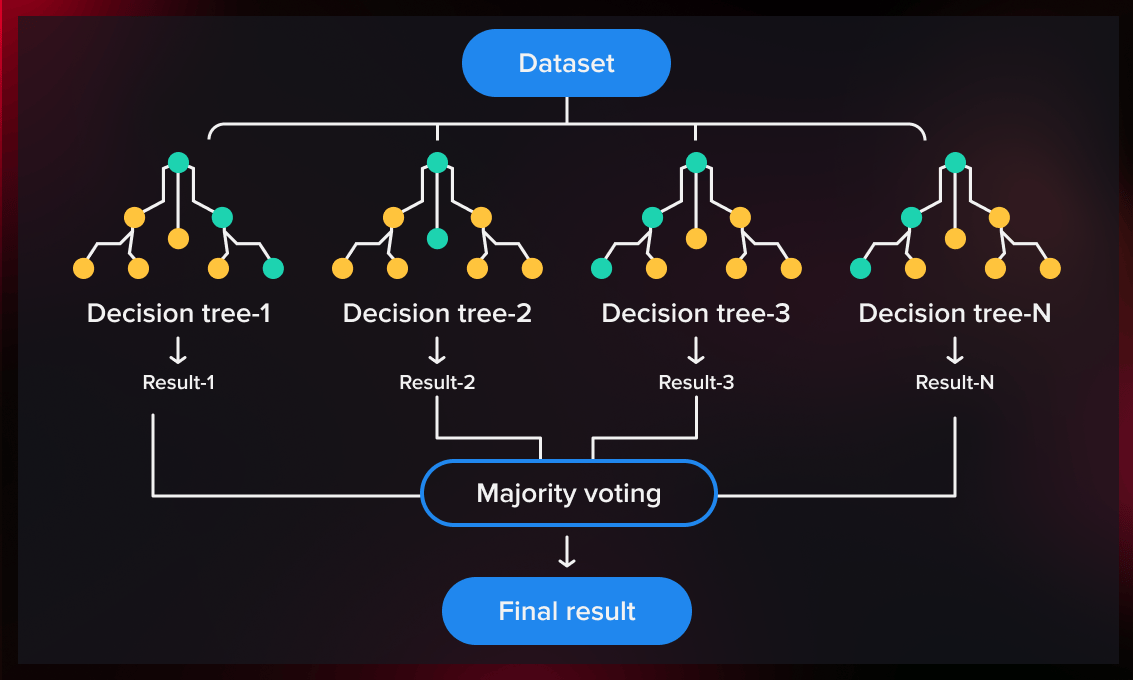

Keunggulan Random Forest:
- Tahan Terhadap Overfitting: Dibandingkan dengan decision tree tunggal yang cenderung overfitting, Random Forest mengurangi risiko overfitting dengan menggabungkan hasil dari banyak pohon. Hal ini membuat prediksi lebih stabil dan akurat.
- Stabilitas yang Tinggi: Karena banyak pohon digunakan, Random Forest cenderung menghasilkan prediksi yang konsisten meskipun ada variabilitas dalam data.
- Menangani Fitur yang Berpengaruh Besar: Algoritma ini juga sangat baik dalam menghadapi dataset dengan fitur yang dominan atau penting, karena bisa meminimalkan bias dari satu pohon tunggal yang mungkin terlalu fokus pada fitur tertentu.
- Fleksibilitas: Random Forest dapat bekerja baik pada dataset dengan banyak fitur atau variabel, dan tetap dapat memberikan hasil yang baik meskipun ada noise dalam data.

Kekurangan Random Forest:

- Waktu dan Memori: Karena membangun banyak pohon keputusan, Random Forest membutuhkan waktu komputasi yang lebih lama serta memori yang lebih besar dibandingkan algoritma lain.
- Kompleksitas Model: Model yang dihasilkan oleh Random Forest cukup kompleks dan sulit untuk diinterpretasikan karena gabungan dari banyak pohon keputusan.

# Final Model Interpretation

## Feature Importance

Feature importance menunjukkan seberapa besar pengaruh setiap fitur terhadap prediksi model. Semakin tinggi nilai feature importance, semakin penting fitur tersebut dalam menentukan hasil prediksi

In [ ]:
feat_imp = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['transformer'].get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False)
df_feat_imp

,features,importance
12,scaler__Number of Policies,0.604401
13,scaler__Monthly Premium Auto,0.330726
14,scaler__Total Claim Amount,0.020691
15,scaler__Income,0.019136
10,ordinal__Education,0.005780
11,ordinal__Renew Offer Type,0.005346
0,onehot__EmploymentStatus_Employed,0.002706
4,onehot__Marital Status_Married,0.002546
5,onehot__Marital Status_Single,0.001992
9,ordinal__Coverage,0.001821


<Axes: xlabel='importance', ylabel='features'>

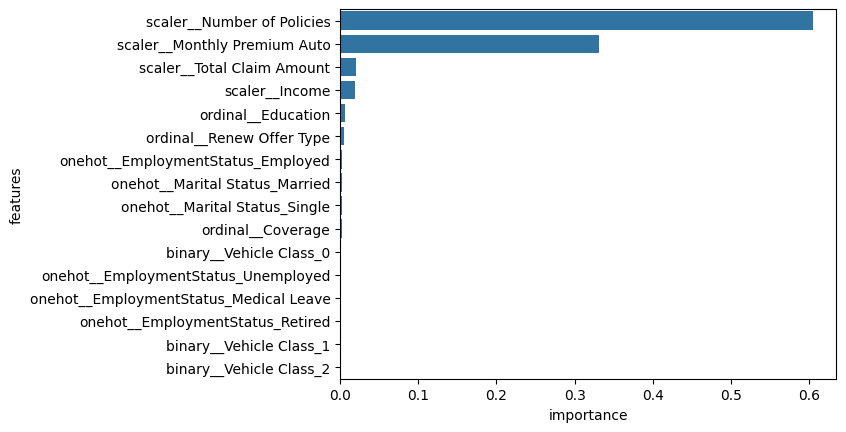

In [ ]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

Pada hasil di atas, fitur `Number of Policies` memiliki nilai importance terbesar (0.604401), yang menunjukkan bahwa jumlah polis sangat berpengaruh terhadap model. `Monthly Premium Auto` dan `Total Claim Amount` juga memiliki pengaruh yang signifikan, dengan nilai masing-masing 0.330726 dan	0.020691. Berikut adalah penjelasan dati tiap fitur yang berpengaruh dalam proses prediksi:
<br>
- Fitur yang paling berpengaruh adalah `Number of Policies`, diikuti oleh `Monthly Premium Auto` dan `Total Claim Amount`.
  - `Number of Policies`: adalah jumlah polis asuransi yang dimiliki oleh seorang pelanggan. Fitur ini mengukur seberapa banyak polis yang dimiliki, dan biasanya semakin banyak polis, semakin tinggi keterlibatan pelanggan dengan perusahaan asuransi. Jumlah polis dapat memengaruhi nilai risiko dan premi yang dikenakan kepada pelanggan.
  - `Monthly Premium Auto`: adalah premi bulanan yang dibayarkan oleh pelanggan untuk polis asuransi mobil mereka. Premi bulanan ini dihitung berdasarkan faktor risiko, termasuk usia, jenis kendaraan, riwayat klaim, dan cakupan asuransi yang dipilih. Fitur ini penting karena premi yang lebih tinggi mungkin mencerminkan tingkat risiko yang lebih besar bagi perusahaan asuransi.
  - `Total Claim Amount`: adalah jumlah klaim yang diajukan oleh pelanggan selama masa polis asuransi. Fitur ini menunjukkan seberapa besar kerugian yang ditanggung oleh perusahaan asuransi untuk pelanggan tertentu. Jumlah klaim yang besar dapat mengindikasikan pelanggan dengan risiko lebih tinggi, dan berpotensi memengaruhi premi atau keputusan pembaruan polis.

  Ketiga fitur diatas penting dalam model asuransi/ CLV karena membantu perusahaan memahami risiko pelanggan, menentukan premi, dan mengelola klaim.

- Fitur-fitur seperti `Marital Status`, `Vehicle Class`, dan`Employment Status` memiliki pengaruh yang rendah dalam model, yang mungkin bisa dipertimbangkan untuk pengurangan atau penyesuaian dalam proses seleksi fitur di masa depan.


## Limitasi

In [ ]:
residual = y_test_no_outliers - y_pred_rf
residual

,Customer Lifetime Value
1497,-2.248469
5032,-114.564353
2703,579.207551
2301,-133.015359
2708,176.891995
...,...
3513,-156.222229
1741,37.892812
193,-268.149485
4198,-1362.484345


In [ ]:
result_data = pd.DataFrame({
    'y_test': y_test_no_outliers,
    'y_pred_rf': y_pred_rf,
    'residual': residual
})
result_data

,y_test,y_pred_rf,residual
1497,2417.759961,2420.008430,-2.248469
5032,8861.482361,8976.046714,-114.564353
2703,8034.520139,7455.312588,579.207551
2301,7809.855966,7942.871325,-133.015359
2708,15055.538360,14878.646365,176.891995
...,...,...,...
3513,6113.869984,6270.092213,-156.222229
1741,5320.081159,5282.188347,37.892812
193,11513.355490,11781.504975,-268.149485
4198,8485.385641,9847.869986,-1362.484345


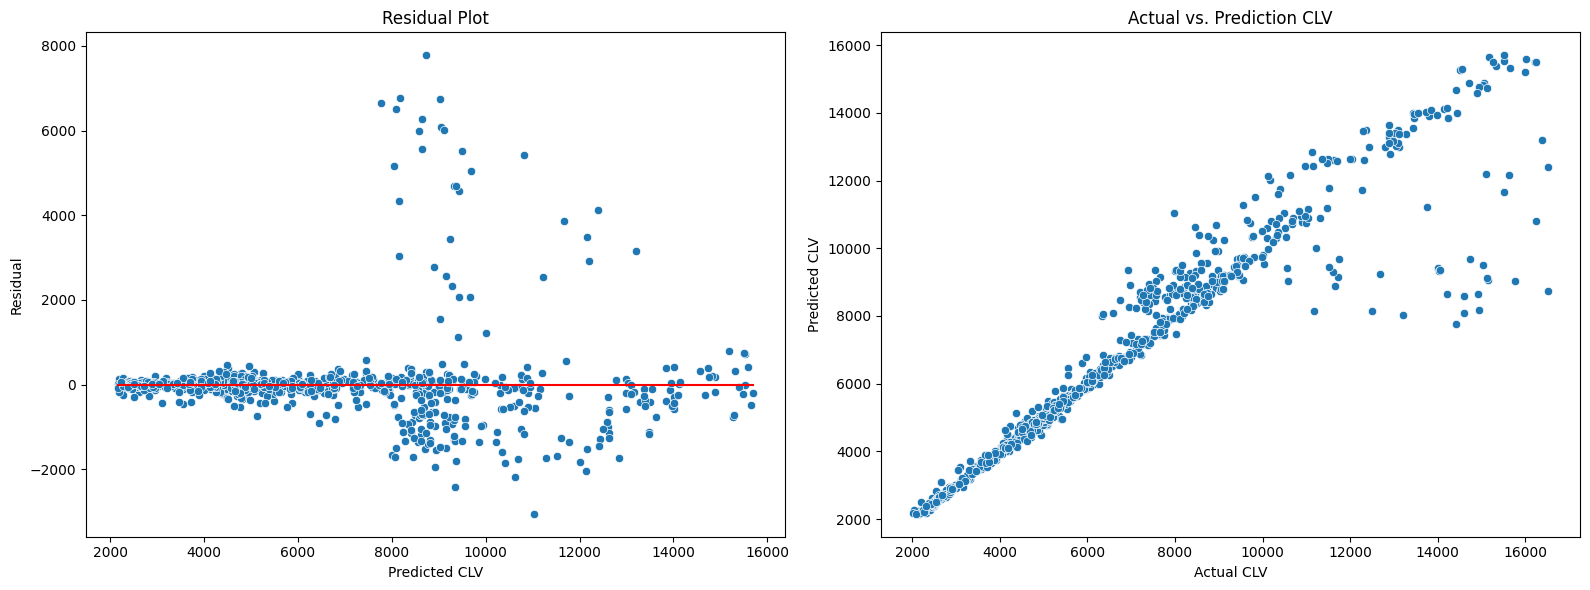

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=result_data, x='y_pred_rf', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=result_data, x='y_pred_rf', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test_no_outliers, y=y_pred_rf).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout();

- Residual plot diatas menunjukkan bahwa prediksi model ini cukup akurat untuk memprediksi CLV < 8000 karena terlihat dengan banyaknya nilai error yang mendekati nilai 0. Diatas 8000 menunjukkan bahwa variance dari residual tidak seragam, terdapat nilai yang overpredict (dengan nilai error dibawah 8000) dan underpredict (error ekstrim dibawah -3000)
- Pada plot Actual vs Predicted CLV, hasil prediksi juga menunjukkan hasil cukup akurat karena plotnya membentuk satu garis lurus dengan terdapat beberapa outlier mulai dari rentang 8000-16000+

kemudian, dibawah ini adalah limitasi dari model yang dibuat:

| Feature | Range |
|---|---|
|Number of Policies	| 1 - 9 |
|	Monthly Premium Auto | 61 -	297 |
| Total Claim Amount |	0.423	- 2759.8 |
|Income |	 0 - 99934|
|Vehicle Class|	[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV Luxury Car]|
|Coverage |	[Extended, Basic, Premium]|
|Renew Offer Type	|[Offer1, Offer3, Offer2, Offer4]|
|EmploymentStatus	|[Retired, Employed, Disabled, Medical Leave, Unemployed]|
|Marital Status	| [Divorced, Married, Single]|
|Education |	[High School or Below, College, Master, Bachelor, Doctor]|
| Customer Lifetime Value | 1898 - 16589.7 |


Diluar dari range limitasi ini, model akan mengalami bias dalam prediksinya.

Serta limitasi untuk Customer Lifetime Value memiliki MAPE sebagai berikut

In [ ]:
df = pd.DataFrame({
    'actual_clv': y_test_no_outliers,
    'predicted_clv': y_pred_rf
})

bins = [0, 5000, 10000, 20000]
range_labels = ['0-5000', '5000-10000', '10000-20000']
df['CLV_range'] = pd.cut(df['actual_clv'], bins=bins, labels=range_labels)

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

mape_per_range = df.groupby('CLV_range').apply(
    lambda group: calculate_mape(group['actual_clv'], group['predicted_clv'])
)

mae_per_range = df.groupby('CLV_range').apply(
    lambda group: calculate_mae(group['actual_clv'], group['predicted_clv'])
)

limit_combined_df = pd.DataFrame({
    'CLV Range': mape_per_range.index,
    'MAE': mae_per_range.values,
    'MAPE (%)': mape_per_range.values
})

print("Combined MAPE and MAE for each CLV range:")
limit_combined_df

Combined MAPE and MAE for each CLV range:


<ipython-input-92-baa950d987d9>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mape_per_range = df.groupby('CLV_range').apply(
<ipython-input-92-baa950d987d9>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_per_range = df.groupby('CLV_range').apply(


,CLV Range,MAE,MAPE (%)
0,0-5000,81.071360,2.262758
1,5000-10000,312.359517,4.199112
2,10000-20000,1482.998516,10.895571


## Estimasi keuntungan

pada pendekatan sebelumnya, model **rule based** menghasilkan **nilai MAE** sebesar **\$4161.14**, dan **setelah** melakukan **modeling denganhyperparameter tuning**, **MAE** menurun menjadi **\$382.38**, terdapat **penurunan MAE sebesar \$3778.76**.<br>

Peningkatan Akurasi: Model ML menunjukkan peningkatan akurasi sebesar 90.79%

    - Peningkatan akurasi = (Penurunan MAE / MAE rule-based) * 100
    - Peningkatan akurasi = (3778,76 / 4161,14) * 100 ≈ 90.79%
    
    - Customer Acuisition Cost = 1/3 * CLV
      = 1/3 * 3778,76
      = $1259.57

berdasarkan data tersebut, Machine Learning dapat mengurangi kesalahan prediksi CLV sebesar \$3778,76. Dengan perbandingan data CLV biasanya adalah 1/3 dari CLV, **maka cost yang dapat dihemat adalah \$1259.57**

# Menyimpan Model

In [ ]:
from google.colab import files

# save model
with open('RandomForest_CLV.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# load model
with open('RandomForest_CLV.pkl', 'rb') as f:
    model_load = pickle.load(f)

# model sudah bisa untuk prediksi
model_load.predict(x)

# Set new Dataset
csv_file_path = 'Final_Dataset_CLV.csv'
df_without_outliers.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kesimpulan dan Rekomendasi

## Kesimpulan

- Model terbaik yang digunakan untuk prediksi **Customer Lifetime Value (CLV)** adalah **Random Forest**, yang telah melalui proses **Hyperparameter-Tuning** serta analisis fitur penting. Proses ini berhasil memaksimalkan performa model, menjadikannya pilihan terbaik untuk perusahaan yang ingin meningkatkan akurasi prediksi CLV dibandingkan metode **rule-based**.

- Model **Random Forest** yang telah dituning menunjukkan performa terbaik dengan **MAE sebesar \$382.38**, **RMSE sebesar \$995.20**, dan **MAPE sebesar 4.35%**. **R² mencapai 0.911**, yang menunjukkan bahwa model ini mampu menjelaskan sekitar **91.1%** variabilitas dalam data CLV. Ini menandakan peningkatan signifikan dibandingkan dengan model **Rule-Based**, yang memiliki **MAE** sebesar **\$4161.14**. Dengan perbedaan **MAE** sebesar **\$3778.76**, perusahaan berpotensi **mengurangi kerugian** hingga **47.6%**, dan melakukan **saving sebesar \$1259.57** melalui penerapan machine learning, menunjukkan keuntungan besar dalam penerapan metode ini.

- Fitur yang berperan signifikan dalam prediksi CLV adalah:
  - **Number of Policies** (60.44%)
  - **Monthly Premium Auto** (33.07%)
  - **Total Claim Amount** (2.07%)
  - **Income** (1.91%)
  - Meskipun fitur-fitur lain memberikan kontribusi lebih kecil, mereka tetap memberikan informasi tambahan yang membantu model menangkap lebih banyak variasi dalam data.

- Proses **Hyperparameter Tuning** berhasil meningkatkan performa model dengan menggunakan parameter seperti:
  - `n_estimators`: 160
  - `max_depth`: 9
  - `min_samples_split`: 10
  - `min_samples_leaf`: 7

- Proses tuning ini dilakukan secara optimal, mempercepat pengambilan keputusan dengan akurasi prediksi yang lebih tinggi, memungkinkan divisi pemasaran untuk merumuskan strategi yang lebih tepat sasaran berdasarkan prediksi CLV.
- Dengan penerapan machine learning, perusahaan tidak hanya dapat meningkatkan akurasi prediksi CLV, tetapi juga menekan kesalahan prediksi yang berpotensi menimbulkan kerugian finansial. Model **Random Forest** memberikan prediksi yang lebih robust dibandingkan metode rule-based, dengan pengurangan error yang signifikan. Hal ini memungkinkan perusahaan untuk lebih efektif dalam merancang strategi pemasaran, memaksimalkan retensi pelanggan, dan mengoptimalkan alokasi sumber daya.

## Rekomendasi untuk model

Berikut adalah rekomendasi lanjutan yang dapat dipertimbangkan oleh perusahaan untuk menjaga dan atau meningkatkan performa model dalam memprediksi CLV:

- **Data Pelanggan yang Lebih Lengkap:** Mengumpulkan data pelanggan yang lebih rinci dan relevan,seperti: State, Response,Effective To Date, Income,Location Code,Months Since Last Claim,Months Since Policy Inception, Number of Open Complaints, Policy Type, Policy,Sales Channel, dan beberapa data relevan lainya dengan harapan penambahan fitur dapat meningkatkan akurasi prediksi.

- **Identifikasi fitur lebih lanjut:** Prediksi yang memiliki error tinggi (CLV>8000), baik yang berlebihan (overprediction) maupun yang kurang (underprediction), kemudian lakukan eksplorasi lebih lanjut untuk mengetahui fitur-fitur apa saja yang menyebabkan error tersebut. Selain itu, dapat dilakukan drop fitur-fitur yang memiliki koefisien kecil yang berarti memiliki pengaruh sangat kecil terhadap prediksi CLV, seperti `Marital Status`, `Vehicle Class`, dan`Employment Status`

- **Eksplorasi Model Lain:** Diluar model yang diuji dalam benchmarking, perusahaan dapat mencoba algoritma regresi lain seperti Support Vector Regression (SVR) atau Neural Networks untuk melihat apakah algoritma dan variasi hyperparameternya dapat memberikan kinerja yang lebih baik dalam memprediksi CLV.

- **Pengembangan model model:** Model yang sudah dibangun dapat digunakan sebagai dasar untuk pengembangan model selanjutnya, seperti menerapkan pembelajaran tanpa pengawasan (unsupervised learning) dengan metode clustering untuk melakukan segmentasi pelanggan yang menguntungkan dan tidak menguntungkan, sehingga strategi pemasaran dapat ditingkatkan.

- **Hyperparameter Tuning Lebih Lanjut:** Melakukan pencarian hyperparameter yang lebih ekstensif untuk menemukan kombinasi optimal yang dapat meningkatkan kinerja model.

- **Integrasi dengan Sistem CRM:** Mengintegrasikan model prediksi CLV dengan sistem Customer Relationship Mxanagement (CRM) untuk memberikan wawasan yang dapat ditindaklanjuti kepada tim penjualan dan pemasaran.

- **Pemantauan Kinerja Model:** Memantau kinerja model secara berkala dan melakukan pembaruan jika diperlukan untuk memastikan akurasi prediksi tetap optimal.

## Rekomendasi untuk bisnis

1. **Personalisasi Penawaran Berdasarkan Fitur Penting**: Mengingat fitur **Number of Policies** dan **Monthly Premium Auto** adalah faktor paling signifikan dalam memprediksi CLV, perusahaan disarankan untuk memanfaatkan data ini dalam strategi pemasaran yang lebih personal. Dengan menawarkan produk atau layanan yang disesuaikan dengan jumlah polis dan premi yang dibayarkan, perusahaan dapat lebih efisien dalam alokasi anggaran pemasaran. Penawaran yang dipersonalisasi ini tidak hanya dapat mengoptimalkan pengeluaran, tetapi juga membantu mencegah pengeluaran berlebih pada pelanggan dengan CLV rendah serta meningkatkan retensi pelanggan bernilai tinggi melalui penawaran yang lebih relevan.

2. **Strategi Upselling dan Cross-selling**: Berdasarkan hasil prediksi CLV, perusahaan dapat menerapkan strategi **upselling** dan **cross-selling** yang lebih efektif. Misalnya, menawarkan produk tambahan atau peningkatan layanan kepada pelanggan yang berpotensi meningkatkan nilai polis mereka. Strategi ini dapat meningkatkan jumlah polis dan premi yang dibayarkan, sehingga secara langsung berkontribusi pada peningkatan CLV. Dengan strategi ini, perusahaan dapat meningkatkan pendapatan dari pelanggan yang ada tanpa harus mencari pelanggan baru secara agresif.

3. **Segmentasi Pelanggan Berbasis Prediksi CLV**: Menggunakan hasil prediksi CLV untuk melakukan **segmentasi pelanggan** memungkinkan perusahaan mengelompokkan pelanggan berdasarkan potensi nilai mereka di masa depan. Dengan segmentasi ini, perusahaan dapat merancang strategi pemasaran, penawaran, dan retensi yang lebih tepat sasaran. Misalnya, pelanggan dengan CLV tinggi dapat difokuskan untuk program retensi khusus, sementara pelanggan dengan CLV rendah dapat diperlakukan dengan strategi pemasaran yang lebih hemat biaya.

4. **Peningkatan Layanan Melalui Personalisasi**: Memanfaatkan prediksi CLV untuk menawarkan produk dan layanan yang lebih relevan kepada pelanggan berdasarkan kebutuhan mereka. Dengan memanfaatkan data seperti jumlah polis yang dimiliki dan besaran premi, perusahaan dapat membuat penawaran yang spesifik untuk setiap pelanggan, meningkatkan kepuasan pelanggan, serta memaksimalkan potensi pendapatan. Penawaran personal ini juga dapat meningkatkan loyalitas pelanggan dalam jangka panjang.

5. **Pengembangan Program Loyalitas yang Berkelanjutan**: Dengan memanfaatkan prediksi CLV, perusahaan dapat mengembangkan **program loyalitas** yang ditargetkan untuk mempertahankan pelanggan bernilai tinggi dan meningkatkan CLV mereka. Program loyalitas ini dapat mencakup insentif khusus, diskon eksklusif, atau layanan premium yang dirancang untuk menjaga keterlibatan pelanggan yang paling bernilai dan meningkatkan nilai mereka bagi perusahaan.

Secara keseluruhan, penggunaan model machine learning dalam memprediksi CLV memungkinkan perusahaan mengembangkan strategi yang lebih cerdas dan terukur dalam hal retensi pelanggan, peningkatan layanan, dan optimasi biaya pemasaran, yang berujung pada peningkatan profitabilitas.